In [1]:
import numpy as np
from numpy import sqrt, log, pi

from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib.pylab import rc
from matplotlib.colors import LogNorm
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import sys
sys.path.append("../")
from signal_generators import *
from dune_backgrounds import *
from dune_constants import *



# Get neutrino rates per 3.5 years
numu_fhc_diff_flux = np.genfromtxt("data/numu_flux_DUNE_FHC_per1GeV_m2_POT.txt")
numu_fhc_diff_flux[:,1] *= 0.25 * EXPOSURE_YEARS*DUNE_POT_PER_YEAR*DUNE_AREA  # multiply by 250 MeV avg bin size

nue_fhc_diff_flux = np.genfromtxt("data/nue_flux_DUNE_FHC_per_1GeV_m2_POT.txt")
nue_fhc_diff_flux[:,1] *= 0.25 * EXPOSURE_YEARS*DUNE_POT_PER_YEAR*DUNE_AREA  # multiply by 250 MeV avg bin size

numubar_fhc_diff_flux = np.genfromtxt("data/numubar_flux_DUNE_FHC_per1GeV_m2_POT.txt")
numubar_fhc_diff_flux[:,1] *= 0.25 * EXPOSURE_YEARS*DUNE_POT_PER_YEAR*DUNE_AREA  # multiply by 250 MeV avg bin size

nuebar_fhc_diff_flux = np.genfromtxt("data/nuebar_flux_DUNE_FHC_per1GeV_m2_POT.txt")
nuebar_fhc_diff_flux[:,1] *= 0.25 * EXPOSURE_YEARS*DUNE_POT_PER_YEAR*DUNE_AREA  # multiply by 250 MeV avg bin size

# after multiplying by factors, we have N_nu(E_nu) per 3.5 years


nu_e_bin_edges= np.arange(875, 30250, 250)
nu_e_bin_centers = (nu_e_bin_edges[1:] + nu_e_bin_edges[:-1])/2
numu_fhc_diff_flux[:,0] = nu_e_bin_centers
nue_fhc_diff_flux[:,0] = nu_e_bin_centers
numubar_fhc_diff_flux[:,0] = nu_e_bin_centers
nuebar_fhc_diff_flux[:,0] = nu_e_bin_centers


numu_xs_dat = np.genfromtxt("data/numu_xs_dividedByEnergy_in_cm-2.txt")
numubar_xs_dat = np.genfromtxt("data/numubar_xs_dividedByEnergy_in_cm-2.txt")

/home/thompson/Dropbox/coding/pyALPs/DUNE-BKG/dune_backgrounds.py:245: RuntimeWarning: invalid value encountered in sqrt
  inv_mass_1g1ep_nue = sqrt((p0_1g1ep_nue_1 + p0_1g1ep_nue_2)**2 - (p1_1g1ep_nue_1 + p1_1g1ep_nue_2)**2 - (p2_1g1ep_nue_1 + p2_1g1ep_nue_2)**2 - (p3_1g1ep_nue_1 + p3_1g1ep_nue_2)**2)
/home/thompson/Dropbox/coding/pyALPs/DUNE-BKG/dune_backgrounds.py:247: RuntimeWarning: invalid value encountered in sqrt
  inv_mass_1g1ep_nuebar = sqrt((p0_1g1ep_nuebar_1 + p0_1g1ep_nuebar_2)**2 - (p1_1g1ep_nuebar_1 + p1_1g1ep_nuebar_2)**2 - (p2_1g1ep_nuebar_1 + p2_1g1ep_nuebar_2)**2 - (p3_1g1ep_nuebar_1 + p3_1g1ep_nuebar_2)**2)
/home/thompson/Dropbox/coding/pyALPs/DUNE-BKG/dune_backgrounds.py:248: RuntimeWarning: invalid value encountered in sqrt
  inv_mass_1g1ep_numubar = sqrt((p0_1g1ep_numubar_1 + p0_1g1ep_numubar_2)**2 - (p1_1g1ep_numubar_1 + p1_1g1ep_numubar_2)**2 - (p2_1g1ep_numubar_1 + p2_1g1ep_numubar_2)**2 - (p3_1g1ep_numubar_1 + p3_1g1ep_numubar_2)**2)


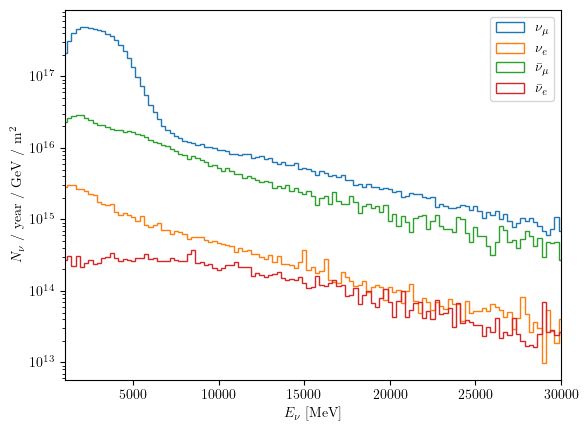

In [2]:

# reproduce

reweight = 1/(EXPOSURE_YEARS*DUNE_AREA*0.25)

plt.hist(numu_fhc_diff_flux[:,0], weights=numu_fhc_diff_flux[:,1]*reweight, bins=nu_e_bin_edges, label=r"$\nu_\mu$", histtype='step')
plt.hist(nue_fhc_diff_flux[:,0],  weights=nue_fhc_diff_flux[:,1]*reweight, bins=nu_e_bin_edges,  label=r"$\nu_e$", histtype='step')
plt.hist(numubar_fhc_diff_flux[:,0],  weights=numubar_fhc_diff_flux[:,1]*reweight, bins=nu_e_bin_edges,  label=r"$\bar{\nu}_\mu$", histtype='step')
plt.hist(nuebar_fhc_diff_flux[:,0],  weights=nuebar_fhc_diff_flux[:,1]*reweight, bins=nu_e_bin_edges,  label=r"$\bar{\nu}_e$", histtype='step')
plt.yscale('log')
#plt.xscale('log')
plt.xlim((1000, 30e3))
plt.xlabel(r"$E_\nu$ [MeV]")
plt.ylabel(r"$N_\nu$ / year / GeV / m$^2$")
plt.legend()
plt.show()

# check number of neutrino events per year (per 3.5 years)
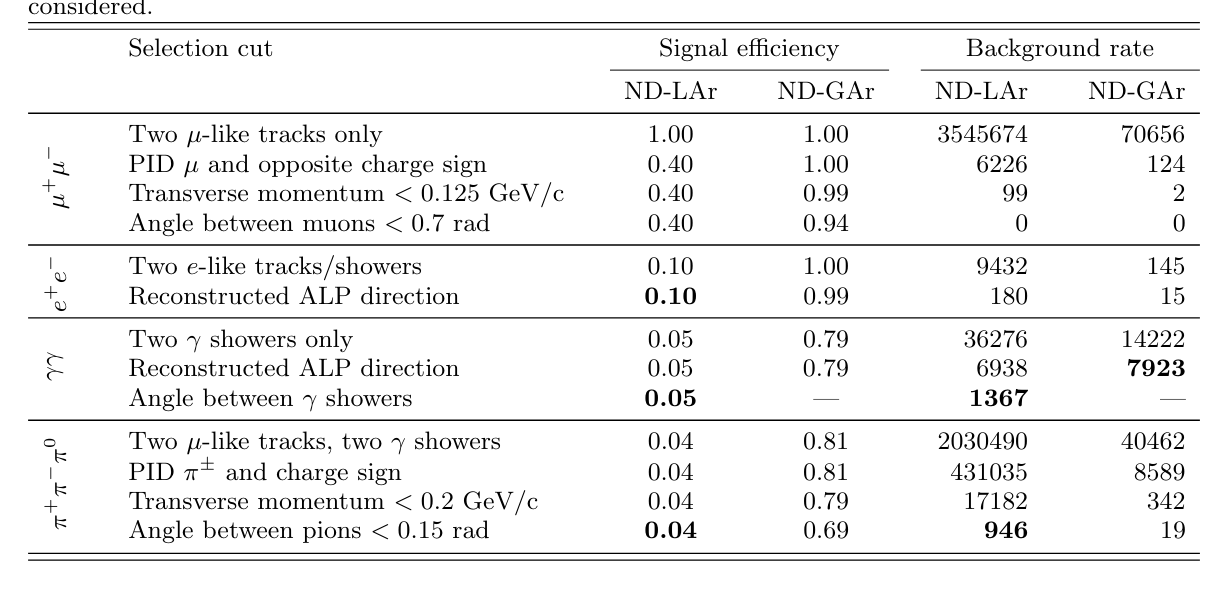

In [3]:
timescale = 3.5 / EXPOSURE_YEARS

In [4]:
# Load background dthetas
# construct dthetas
bkg_2g_nue = Background2Particle(data_file_name="data/2gamma/2gamma_nue_4vectors_DUNE_bkg.txt", nu_flavor="nue")
bkg_2g_numu = Background2Particle(data_file_name="data/2gamma/2gamma_numu_4vectors_DUNE_bkg.txt", nu_flavor="numu")
bkg_2g_numubar = Background2Particle(data_file_name="data/2gamma/2gamma_numubar_4vectors_DUNE_bkg.txt", nu_flavor="numubar")
bkg_2g_nuebar = Background2Particle(data_file_name="data/2gamma/2gamma_nuebar_4vectors_DUNE_bkg.txt", nu_flavor="nuebar")

# construct dthetas
bkg_epem_nue = Background2Particle(data_file_name="data/1em1ep/epem_nue_4vectors_DUNE_bkg.txt", nu_flavor="nue", mass_particle_1=M_E, mass_particle_2=M_E)
bkg_epem_numu = Background2Particle(data_file_name="data/1em1ep/epem_numu_4vectors_DUNE_bkg.txt", nu_flavor="numu", mass_particle_1=M_E, mass_particle_2=M_E)
bkg_epem_numubar = Background2Particle(data_file_name="data/1em1ep/epem_numubar_4vectors_DUNE_bkg.txt", nu_flavor="numubar", mass_particle_1=M_E, mass_particle_2=M_E)
bkg_epem_nuebar = Background2Particle(data_file_name="data/1em1ep/epem_nuebar_4vectors_DUNE_bkg.txt", nu_flavor="nuebar", mass_particle_1=M_E, mass_particle_2=M_E)


bkg_1g1em_nue = Background2Particle(data_file_name="data/1g1e0p/emgamma_nue_4vectors_DUNE_bkg.txt",
                                    mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="nue")
bkg_1g1em_numu = Background2Particle(data_file_name="data/1g1e0p/emgamma_numu_4vectors_DUNE_bkg.txt",
                                     mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="numu")
bkg_1g1em_numubar = Background2Particle(data_file_name="data/1g1e0p/emgamma_numubar_4vectors_DUNE_bkg.txt",
                                        mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="numubar")
bkg_1g1em_nuebar = Background2Particle(data_file_name="data/1g1e0p/emgamma_nuebar_4vectors_DUNE_bkg.txt",
                                       mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="nuebar")

bkg_1g1ep_nue = Background2Particle(data_file_name="data/1g1e0p/epgamma_nue_4vectors_DUNE_bkg.txt",
                                    mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="nue")
bkg_1g1ep_numu = Background2Particle(data_file_name="data/1g1e0p/epgamma_numu_4vectors_DUNE_bkg.txt",
                                     mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="numu")
bkg_1g1ep_numubar = Background2Particle(data_file_name="data/1g1e0p/epgamma_numubar_4vectors_DUNE_bkg.txt",
                                        mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="numubar")
bkg_1g1ep_nuebar = Background2Particle(data_file_name="data/1g1e0p/epgamma_nuebar_4vectors_DUNE_bkg.txt",
                                       mass_particle_1=0.0, mass_particle_2=M_E, nu_flavor="nuebar")

### 1gamma, 1e-, 1e+

In [5]:
timescale = 3.5 / EXPOSURE_YEARS

print("1gamma, nu_e: ", np.sum(weights1_nue_g)*timescale)
print("1ep, nu_e: ", E2GAMMA_MISID*np.sum(weights1_nue_ep)*timescale)
print("1em, nu_e: ", E2GAMMA_MISID*np.sum(weights1_nue_em)*timescale)

print("1gamma, nu_mu: ", np.sum(weights1_numu_g)*timescale)
print("1ep, nu_mu: ", E2GAMMA_MISID*np.sum(weights1_numu_ep)*timescale)
print("1em, nu_mu: ", E2GAMMA_MISID*np.sum(weights1_numu_em)*timescale)

print("1gamma, nu_ebar: ", np.sum(weights1_nuebar_g)*timescale)
print("1ep, nu_ebar: ", E2GAMMA_MISID*np.sum(weights1_nuebar_ep)*timescale)
print("1em, nu_ebar: ", E2GAMMA_MISID*np.sum(weights1_nuebar_em)*timescale)

print("1gamma, nu_mubar: ", np.sum(weights1_numubar_g)*timescale)
print("1ep, nu_mubar: ", E2GAMMA_MISID*np.sum(weights1_numubar_ep)*timescale)
print("1em, nu_mubar: ", E2GAMMA_MISID*np.sum(weights1_numubar_em)*timescale)

print("1gamma TOTAL = ", (np.sum(weights1_nue_g) + np.sum(weights1_numu_g) + np.sum(weights1_nuebar_g) + np.sum(weights1_numubar_g))*timescale)
print("1ep TOTAL = ", E2GAMMA_MISID*(np.sum(weights1_nue_ep) + np.sum(weights1_numu_ep) + np.sum(weights1_nuebar_ep) + np.sum(weights1_numubar_ep))*timescale)
print("1em TOTAL = ", E2GAMMA_MISID*(np.sum(weights1_nue_em) + np.sum(weights1_numu_em) + np.sum(weights1_nuebar_em) + np.sum(weights1_numubar_em))*timescale)

1gamma, nu_e:  38036.028000000006
1ep, nu_e:  7924.414788000002
1em, nu_e:  639505.6014960035
1gamma, nu_mu:  2023751.083999999
1ep, nu_mu:  400089.8073599998
1em, nu_mu:  400158.8143199998
1gamma, nu_ebar:  4913.672174999999
1ep, nu_ebar:  82906.58030849876
1em, nu_ebar:  998.3646235799998
1gamma, nu_mubar:  113153.94089999996
1ep, nu_mubar:  22462.96033799999
1em, nu_mubar:  22475.65319999999
1gamma TOTAL =  2179854.725074999
1ep TOTAL =  513383.7627944985
1em TOTAL =  1063138.4336395832


### 2 gamma counts

In [6]:
timescale = 3.5 / EXPOSURE_YEARS

print("2gamma, nu_mu: ", np.sum(bkg_2g_numu.weights)*timescale)
print("2gamma, nu_e: ", np.sum(bkg_2g_nue.weights)*timescale)
print("2gamma, nu_mubar: ", np.sum(bkg_2g_numubar.weights)*timescale)
print("2gamma, nu_ebar: ", np.sum(bkg_2g_nuebar.weights)*timescale)
print("2gamma TOTAL = ", (np.sum(bkg_2g_numu.weights) + np.sum(bkg_2g_nue.weights) + np.sum(bkg_2g_numubar.weights) + np.sum(bkg_2g_nuebar.weights))*timescale)


2gamma, nu_mu:  559618.5639999998
2gamma, nu_e:  14056.210800000004
2gamma, nu_mubar:  57071.44169999998
2gamma, nu_ebar:  2992.4807129999995
2gamma TOTAL =  633738.6972129998


### 1gamma 1e- / 1e+

In [7]:
timescale = 3.5 / EXPOSURE_YEARS
print("1g1em, nu_e: ", np.sum(weights1_nue_1g1em)*timescale)
print("1g1em, nu_mu: ", np.sum(weights1_numu_1g1em)*timescale)
print("1g1em, nu_ebar: ", np.sum(weights1_nuebar_1g1em)*timescale)
print("1g1em, nu_mubar: ", np.sum(weights1_numubar_1g1em)*timescale)

print("1g1ep, nu_e: ", np.sum(weights1_nue_1g1ep)*timescale)
print("1g1ep, nu_mu: ", np.sum(weights1_numu_1g1ep)*timescale)
print("1g1ep, nu_ebar: ", np.sum(weights1_nuebar_1g1ep)*timescale)
print("1g1ep, nu_mubar: ", np.sum(weights1_numubar_1g1ep)*timescale)

1g1em, nu_e:  267.79200000000003
1g1em, nu_mu:  6552.175999999998
1g1em, nu_ebar:  40.32406799999999
1g1em, nu_mubar:  739.5569999999997
1g1ep, nu_e:  16609.320600000003
1g1ep, nu_mu:  1083095.6039999996
1g1ep, nu_ebar:  2470.3103879999994
1g1ep, nu_mubar:  56226.97079999998


### e+e-

In [8]:
timescale = 3.5 / EXPOSURE_YEARS

print("epem, nu_e: ", np.sum(bkg_epem_nue.weights)*timescale)
print("epem, nu_mu: ", np.sum(bkg_epem_numu.weights)*timescale)
print("epem, nu_ebar: ", np.sum(bkg_epem_nuebar.weights)*timescale)
print("epem, nu_mubar: ", np.sum(bkg_epem_numubar.weights)*timescale)
print("epem TOTAL = ", (np.sum(bkg_epem_numu.weights) + np.sum(bkg_epem_nue.weights) + np.sum(bkg_epem_nuebar.weights) + np.sum(bkg_epem_numubar.weights))*timescale)

print("MIS-ID rates:")

print("1g1em, nu_e: ", E2GAMMA_MISID*np.sum(weights1_nue_1g1em)*timescale)
print("1g1em, nu_mu: ", E2GAMMA_MISID*np.sum(weights1_numu_1g1em)*timescale)
print("1g1em, nu_ebar: ", E2GAMMA_MISID*np.sum(weights1_nuebar_1g1em)*timescale)
print("1g1em, nu_mubar: ", E2GAMMA_MISID*np.sum(weights1_numubar_1g1em)*timescale)

print("1g1ep, nu_e: ", E2GAMMA_MISID*np.sum(weights1_nue_1g1ep)*timescale)
print("1g1ep, nu_mu: ", E2GAMMA_MISID*np.sum(weights1_numu_1g1ep)*timescale)
print("1g1ep, nu_ebar: ", E2GAMMA_MISID*np.sum(weights1_nuebar_1g1ep)*timescale)
print("1g1ep, nu_mubar: ", E2GAMMA_MISID*np.sum(weights1_numubar_1g1ep)*timescale)

epem, nu_e:  8566.953000000001
epem, nu_mu:  1759851.7399999993
epem, nu_ebar:  1324.3689
epem, nu_mubar:  98125.45469999997
epem TOTAL =  1867868.516599999
MIS-ID rates:
1g1em, nu_e:  48.202560000000005
1g1em, nu_mu:  1179.3916799999995
1g1em, nu_ebar:  7.258332239999998
1g1em, nu_mubar:  133.12025999999994
1g1ep, nu_e:  2989.677708
1g1ep, nu_mu:  194957.2087199999
1g1ep, nu_ebar:  444.65586983999987
1g1ep, nu_mubar:  10120.854743999997


# Signal vs Background Plots

### Color lists

In [9]:
color_list = [COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU, 'sienna', 'darkgoldenrod', 'dimgray', 'gold', 'lightsteelblue', 'darkred', 'olive', 'forestgreen']

In [10]:
##################### BINS #####################
angle_bins = np.logspace(-5, DUNE_SOLID_ANGLE, 50)
bkg_energy_bins = np.linspace(30.0e-3, 100, 50)  # GeV
delta_angle_bins = np.linspace(0.0, 1.0, 60)
rad_to_deg = 180.0/np.pi

param_str_1MeV = r"$m_a = 1$ MeV, $g_{a\gamma} = 1.75 \cdot 10^{-5}$ GeV$^{-1}$"
param_str_10MeV = r"$m_a = 10$ MeV, $g_{a\gamma} = 1.8 \cdot 10^{-6}$ GeV$^{-1}$"
param_str_500MeV = r"$m_a = 500$ MeV, $g_{a\gamma} = 2 \cdot 10^{-7}$ GeV$^{-1}$"

param_str_10MeV_hi = r"$m_a = 10$ MeV, $g_{a\gamma} = 10^{-3}$ GeV$^{-1}$"
param_str_100MeV_hi = r"$m_a = 100$ MeV, $g_{a\gamma} = 2 \cdot 10^{-5}$ GeV$^{-1}$"
param_str_500MeV_hi = r"$m_a = 500$ MeV, $g_{a\gamma} = 6 \cdot 10^{-7}$ GeV$^{-1}$"

# Small coupling, 2 gamma
g1e_1MeV, g2e_1MeV, g1_theta_1MeV, g2_theta_1MeV, \
    m2_1MeV, etotal_1MeV, dtheta_1MeV, wgts_1MeV = generate_alp_events_2gamma(ma=1.0, g=1.75e-8, n_flux_samples=30)
print("Signals: 1/6")
g1e_10MeV, g2e_10MeV, g1_theta_10MeV, g2_theta_10MeV, \
    m2_10MeV, etotal_10MeV, dtheta_10MeV, wgts_10MeV = generate_alp_events_2gamma(ma=10.0, g=1.8e-9, n_flux_samples=30)
print("Signals: 2/6")
g1e_500MeV, g2e_500MeV, g1_theta_500MeV, g2_theta_500MeV, \
    m2_500MeV, etotal_500MeV, dtheta_500MeV, wgts_500MeV = generate_alp_events_2gamma(ma=500.0, g=2e-10, n_flux_samples=30)
print("Signals: 3/6")

# Large coupling, 2 gamma
g1e_10MeV_hi, g2e_10MeV_hi, g1_theta_10MeV_hi, g2_theta_10MeV_hi, \
    m2_10MeV_hi, etotal_10MeV_hi, dtheta_10MeV_hi, wgts_10MeV_hi = generate_alp_events_2gamma(ma=10.0, g=1.0e-6, n_flux_samples=10)
print("Signals: 4/6")
g1e_100MeV_hi, g2e_100MeV_hi, g1_theta_100MeV_hi, g2_theta_100MeV_hi, \
    m2_100MeV_hi, etotal_100MeV_hi, dtheta_100MeV_hi, wgts_100MeV_hi = generate_alp_events_2gamma(ma=100.0, g=2e-8, n_flux_samples=10)
print("Signals: 5/6")
g1e_500MeV_hi, g2e_500MeV_hi, g1_theta_500MeV_hi, g2_theta_500MeV_hi, \
    m2_500MeV_hi, etotal_500MeV_hi, dtheta_500MeV_hi, wgts_500MeV_hi = generate_alp_events_2gamma(ma=500.0, g=6e-10, n_flux_samples=30)
print("Signals: 6/6")

# Small coupling, 1 gamma

Simulating and propagating ALP flux for ma=1.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 3.0425379276275635 s
Signals: 1/6
Simulating and propagating ALP flux for ma=10.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 3.2443630695343018 s
Signals: 2/6
Simulating and propagating ALP flux for ma=500.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 1.8162117004394531 s
Signals: 3/6
Simulating and propagating ALP flux for ma=10.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 0.5073797702789307 s
Signals: 4/6
Simulating and propagating ALP flux for ma=100.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 0.32756757736206055 s
Signals: 5/6
Simulating and propagating ALP flux for ma=500.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 1.1537690162658691 s
Signals: 6/6


In [11]:
color_array_all = ['lightsteelblue', 'darkred', 'olive', 'sienna', 'slateblue', 'khaki', 'teal', 'dimgray', 'silver', 'rosybrown', 'royalblue', 'tan']

# Plots: 2 gamma

/tmp/ipykernel_12195/1725378820.py:120: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0, 0.2, 1.0])


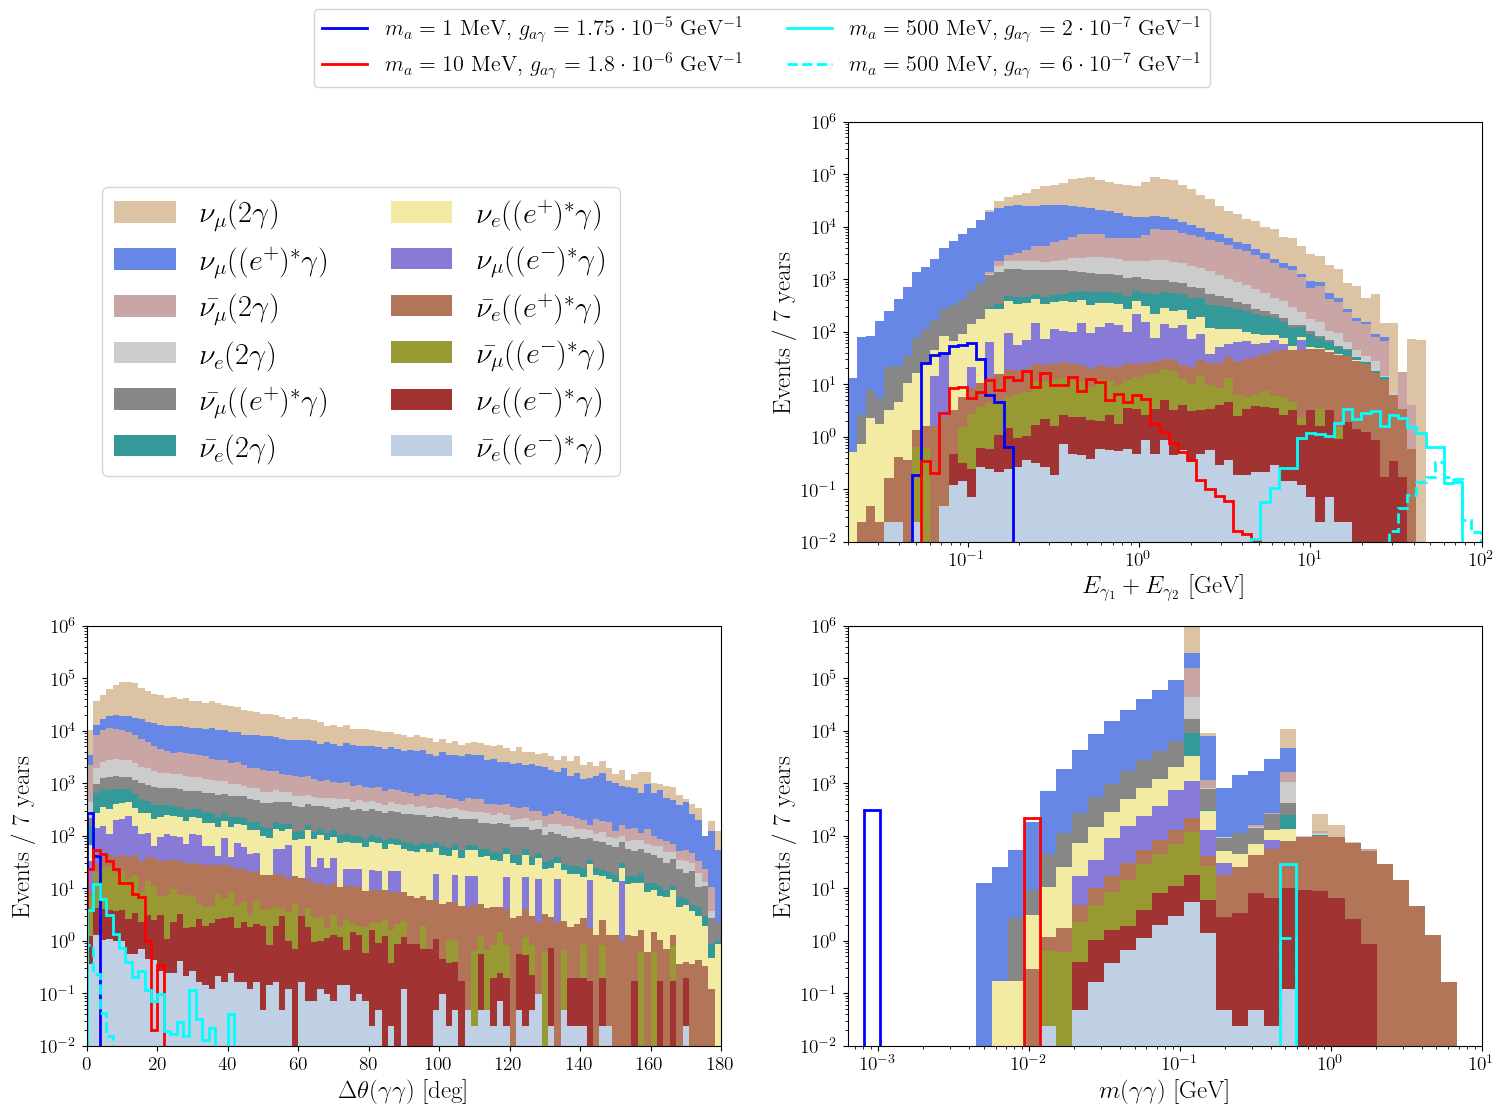

In [12]:
# Total energy
#all_bins = np.linspace(1.0, 40.0, 50)
unique_energies = np.unique(forward_photon_flux[:,0])
bkg_gev_bin_edges = 1e-3*np.logspace(np.log10(unique_energies[0])-0.025, np.log10(unique_energies[-1])+0.025, 100)
energies_2gamma = [1e-3*(p0_2g_nuebar_1 + p0_2g_nuebar_2), 1e-3*(p0_2g_nue_1 + p0_2g_nue_2), 1e-3*(p0_2g_numubar_1 + p0_2g_numubar_2), 1e-3*(p0_2g_numu_1 + p0_2g_numu_2),
                   1e-3*(p0_1g1ep_nuebar_1 + p0_1g1ep_nuebar_2), 1e-3*(p0_1g1ep_nue_1 + p0_1g1ep_nue_2), 1e-3*(p0_1g1ep_numubar_1 + p0_1g1ep_numubar_2), 1e-3*(p0_1g1ep_numu_1 + p0_1g1ep_numu_2),
                   1e-3*(p0_1g1em_nuebar_1 + p0_1g1em_nuebar_2), 1e-3*(p0_1g1em_nue_1 + p0_1g1em_nue_2), 1e-3*(p0_1g1em_numubar_1 + p0_1g1em_numubar_2), 1e-3*(p0_1g1em_numu_1 + p0_1g1em_numu_2)]
weights_2gamma = [weights1_nuebar_2g, weights1_nue_2g, weights1_numubar_2g, weights1_numu_2g,
                  E2GAMMA_MISID*bkg_1g1ep_nuebar.weights, E2GAMMA_MISID*bkg_1g1ep_nue.weights, E2GAMMA_MISID*bkg_1g1ep_numubar.weights, E2GAMMA_MISID*bkg_1g1ep_numu.weights,
                  E2GAMMA_MISID*bkg_1g1em_nuebar.weights, E2GAMMA_MISID*bkg_1g1em_nue.weights, E2GAMMA_MISID*bkg_1g1em_numubar.weights, E2GAMMA_MISID*bkg_1g1em_numu.weights]
text_labels_2gamma = [r"$\bar{\nu_e}(2\gamma)$", r"$\nu_e(2\gamma)$", r"$\bar{\nu_\mu}(2\gamma)$", r"$\nu_\mu(2\gamma)$",
            r"$\bar{\nu_e}((e^+)^*\gamma)$", r"$\nu_e((e^+)^*\gamma)$", r"$\bar{\nu_\mu}((e^+)^*\gamma)$", r"$\nu_\mu((e^+)^*\gamma)$",
            r"$\bar{\nu_e}((e^-)^*\gamma)$", r"$\nu_e((e^-)^*\gamma)$", r"$\bar{\nu_\mu}((e^-)^*\gamma)$", r"$\nu_\mu((e^-)^*\gamma)$",]



colors_2gamma = [COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU, 'sienna', 'khaki', 'dimgray', 'royalblue', 'lightsteelblue', 'darkred', 'olive', 'slateblue']
weight_sum_2gamma = [np.sum(wgts) for wgts in weights_2gamma]
sorted_args_2gamma = np.argsort(weight_sum_2gamma)
energies_2gamma = [energies_2gamma[i] for i in sorted_args_2gamma]
weights_2gamma_sorted = [weights_2gamma[i] for i in sorted_args_2gamma]
text_labels_2gamma = [text_labels_2gamma[i] for i in sorted_args_2gamma]
colors_2gamma = [colors_2gamma[i] for i in sorted_args_2gamma]

inv_mass_2gamma = [bkg_2g_nuebar.inv_mass*1e-3, bkg_2g_nue.inv_mass*1e-3, bkg_2g_numubar.inv_mass*1e-3, bkg_2g_numu.inv_mass*1e-3,
                  bkg_1g1ep_nuebar.inv_mass*1e-3, bkg_1g1ep_nue.inv_mass*1e-3, bkg_1g1ep_numubar.inv_mass*1e-3, bkg_1g1ep_numu.inv_mass*1e-3,
                bkg_1g1em_nuebar.inv_mass*1e-3, bkg_1g1em_nue.inv_mass*1e-3, bkg_1g1em_numubar.inv_mass*1e-3, bkg_1g1em_numu.inv_mass*1e-3]
inv_mass_2gamma_sorted = [inv_mass_2gamma[i] for i in sorted_args_2gamma]

dthetas_2gamma = [bkg_2g_nuebar.dtheta_deg, bkg_2g_nue.dtheta_deg, bkg_2g_numubar.dtheta_deg, bkg_2g_numu.dtheta_deg,
                  bkg_1g1ep_nuebar.dtheta_deg, bkg_1g1ep_nue.dtheta_deg, bkg_1g1ep_numubar.dtheta_deg, bkg_1g1ep_numu.dtheta_deg,
                bkg_1g1em_nuebar.dtheta_deg, bkg_1g1em_nue.dtheta_deg, bkg_1g1em_numubar.dtheta_deg, bkg_1g1em_numu.dtheta_deg]
dthetas_2gamma = [dthetas_2gamma[i] for i in sorted_args_2gamma]



alp_labels = [param_str_1MeV, param_str_10MeV, param_str_500MeV, param_str_500MeV_hi]
alp_colors = ['b', 'r', 'cyan', 'cyan']
alp_linestyles = ['-', '-', '-', '--']


# Make the subplots


fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
(ax0, ax1), (ax2, ax3) = axs

ax0.axis('off')

ax1.hist(energies_2gamma, weights=weights_2gamma_sorted, label=text_labels_2gamma, color=colors_2gamma,
         bins=bkg_gev_bin_edges, stacked=True, histtype='stepfilled', alpha=0.8)
ax1.hist(1e-3*etotal_1MeV, weights=wgts_1MeV, bins=bkg_gev_bin_edges,
            color='b', histtype='step', linewidth=2.0)
ax1.hist(1e-3*etotal_10MeV, weights=wgts_10MeV, bins=bkg_gev_bin_edges,
            color='r', histtype='step', linewidth=2.0)
ax1.hist(1e-3*etotal_500MeV, weights=wgts_500MeV, bins=bkg_gev_bin_edges,
            color='cyan', histtype='step', linewidth=2.0)
ax1.hist(1e-3*etotal_500MeV_hi, weights=wgts_500MeV_hi, bins=bkg_gev_bin_edges,
            color='cyan', histtype='step', ls='dashed', linewidth=2.0)

ax1.set_xlabel(r"$E_{\gamma_1} + E_{\gamma_2}$ [GeV]", fontsize=18)
ax1.set_ylabel(r"Events / 7 years", fontsize=18)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlim((20.0e-3, 100.0))
ax1.set_ylim((1e-2,1e6))


ax1.legend(fontsize=22, bbox_to_anchor=(0.0, 0.5), bbox_transform=ax0.transAxes, loc="center left", ncol=2)


dtheta_bins = np.linspace(0.0, 180.0, 100)

ax2.hist(dthetas_2gamma, weights=weights_2gamma_sorted, label=text_labels_2gamma, color=colors_2gamma,
         bins=dtheta_bins, stacked=True, histtype='stepfilled', alpha=0.8)
ax2.hist(dtheta_1MeV*180.0/pi, weights=wgts_1MeV, bins=dtheta_bins,
            color='b', histtype='step', linewidth=2.0)
ax2.hist(dtheta_10MeV*180.0/pi, weights=wgts_10MeV, bins=dtheta_bins,
            color='r', histtype='step', linewidth=2.0)
ax2.hist(dtheta_500MeV*180.0/pi, weights=wgts_500MeV, bins=dtheta_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax2.hist(dtheta_500MeV_hi*180.0/pi, weights=wgts_500MeV_hi, bins=dtheta_bins,
            color='cyan', histtype='step', ls='dashed', linewidth=2.0)
ax2.set_xlabel(r"$\Delta\theta(\gamma\gamma)$ [deg]", fontsize=18)
ax2.set_ylabel(r"Events / 7 years", fontsize=18)
ax2.set_yscale('log')
ax2.set_xlim((dtheta_bins[0], dtheta_bins[-1]))
ax2.set_ylim((1e-2, 1e6))
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

mass_bins = np.logspace(-3.2, 2, 50)


ax3.hist(inv_mass_2gamma_sorted,  weights=weights_2gamma_sorted, label=text_labels_2gamma, color=colors_2gamma,
         bins=mass_bins, stacked=True, histtype='stepfilled', alpha=0.8)
ax3.hist(1e-3*m2_1MeV, weights=wgts_1MeV, bins=mass_bins,
            color='b', histtype='step', linewidth=2.0)
ax3.hist(1e-3*m2_10MeV, weights=wgts_10MeV, bins=mass_bins,
            color='r', histtype='step', linewidth=2.0)
ax3.hist(1e-3*m2_500MeV, weights=wgts_500MeV, bins=mass_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax3.hist(1e-3*m2_500MeV_hi, weights=wgts_500MeV_hi, bins=mass_bins,
            color='cyan', histtype='step', ls='dashed', linewidth=2.0)
ax3.set_xlabel(r"$m(\gamma\gamma)$ [GeV]", fontsize=18)
ax3.set_ylabel(r"Events / 7 years", fontsize=18)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlim((mass_bins[0],10.0))
ax3.set_ylim((1e-2, 1e6))
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

# Create a separate legend along the top for the parametric histograms
lines = [plt.Line2D([0], [0], color=color, linestyle=ls, linewidth=2) for color, ls in zip(alp_colors, alp_linestyles)]
separate_legend = fig.legend(lines, alp_labels, loc='upper center', fontsize=16, ncol=2, borderaxespad=-0.2, bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 0.2, 1.0])
plt.savefig("plots/2g0p/energy_angle_mass_spectra_2g_sig-bkgs.pdf")
plt.show()
plt.close()



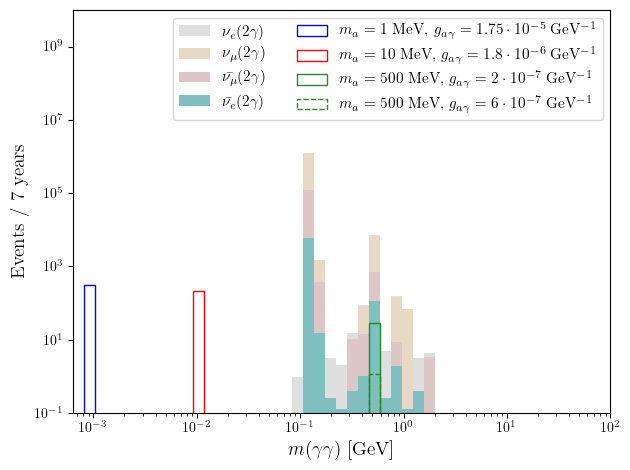

In [13]:
# mass distribution
mass_bins = np.logspace(-3.2, 2, 50)
plt.hist([inv_mass_2g_nuebar*1e-3, inv_mass_2g_numubar*1e-3, inv_mass_2g_numu*1e-3, inv_mass_2g_nue*1e-3],
         weights=[weights1_nuebar_2g, weights1_numubar_2g, weights1_numu_2g, weights1_nue_2g],
         label=[r"$\bar{\nu_e}(2\gamma)$", r"$\bar{\nu_\mu}(2\gamma)$", r"$\nu_\mu(2\gamma)$", r"$\nu_e(2\gamma)$"],
         bins=mass_bins, stacked=True, histtype='stepfilled', color=[COLOR_NUEBAR, COLOR_NUMUBAR, COLOR_NUMU, COLOR_NUE], alpha=0.5)
plt.hist(1e-3*m2_1MeV, weights=wgts_1MeV, bins=mass_bins,
            label=param_str_1MeV, color='b', histtype='step')
plt.hist(1e-3*m2_10MeV, weights=wgts_10MeV, bins=mass_bins,
            label=param_str_10MeV, color='r', histtype='step')
plt.hist(1e-3*m2_500MeV, weights=wgts_500MeV, bins=mass_bins,
            label=param_str_500MeV, color='forestgreen', histtype='step')
plt.hist(1e-3*m2_500MeV_hi, weights=wgts_500MeV_hi, bins=mass_bins,
            label=param_str_500MeV_hi, color='forestgreen', histtype='step', ls='dashed')
plt.ylabel(r"Events / 7 years", fontsize=14)
plt.xlabel(r"$m(\gamma\gamma)$ [GeV]", fontsize=14)
plt.legend(fontsize=11, loc="upper right", ncol=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim((mass_bins[0], mass_bins[-1]))
plt.ylim((1e-1,1e10))
plt.tight_layout()
plt.savefig("plots/2g0p/mass_spectra_2g_sig-bkgs.png")
plt.show()
plt.close()

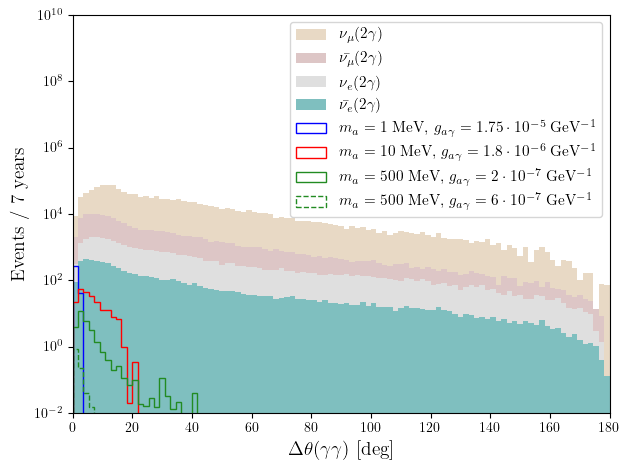

In [14]:
# ANGULAR distribution
dtheta_bins = np.linspace(0.0, 180.0, 100)
plt.hist([bkg_2g_nuebar.dtheta_deg, bkg_2g_nue.dtheta_deg, bkg_2g_numubar.dtheta_deg, bkg_2g_numu.dtheta_deg],
         weights=[weights1_nuebar_2g, weights1_nue_2g, weights1_numubar_2g, weights1_numu_2g],
         label=[r"$\bar{\nu_e}(2\gamma)$", r"$\nu_e(2\gamma)$", r"$\bar{\nu_\mu}(2\gamma)$", r"$\nu_\mu(2\gamma)$"],
         bins=dtheta_bins, stacked=True, histtype='stepfilled', color=[COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU], alpha=0.5)
plt.hist(dtheta_1MeV*180.0/pi, weights=wgts_1MeV, bins=dtheta_bins,
            label=param_str_1MeV, color='b', histtype='step')
plt.hist(dtheta_10MeV*180.0/pi, weights=wgts_10MeV, bins=dtheta_bins,
            label=param_str_10MeV, color='r', histtype='step')
plt.hist(dtheta_500MeV*180.0/pi, weights=wgts_500MeV, bins=dtheta_bins,
            label=param_str_500MeV, color='forestgreen', histtype='step')
plt.hist(dtheta_500MeV_hi*180.0/pi, weights=wgts_500MeV_hi, bins=dtheta_bins,
            label=param_str_500MeV_hi, color='forestgreen', histtype='step', ls='dashed')
plt.ylabel(r"Events / 7 years", fontsize=14)
plt.xlabel(r"$\Delta\theta(\gamma\gamma)$ [deg]", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.yscale('log')
#plt.xscale('log')
plt.xlim((dtheta_bins[0], dtheta_bins[-1]))
plt.ylim((1e-2, 1e10))
plt.tight_layout()
plt.savefig("plots/2g0p/dtheta_spectra_2g_sig-bkgs.png")
plt.show()
plt.close()

### Testing invariant mass cut

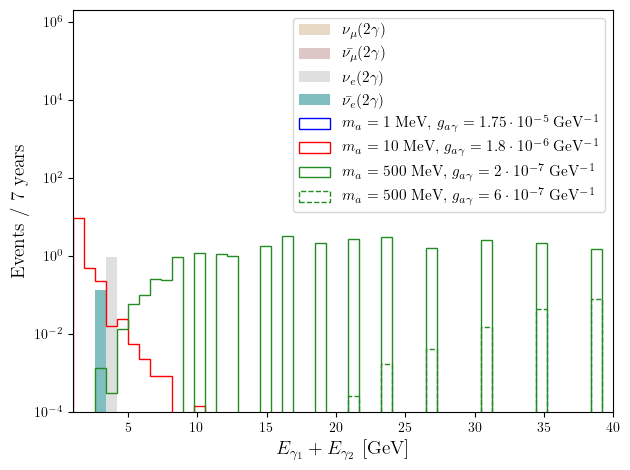

In [15]:
test_mass = 500.0
lowcut = 0.975
hicut = 1.025
bkg_2g_nuebar_m2_mask = (bkg_2g_nuebar.inv_mass > lowcut*test_mass) * (bkg_2g_nuebar.inv_mass < hicut*test_mass)
bkg_2g_numu_m2_mask = (bkg_2g_numu.inv_mass > lowcut*test_mass) * (bkg_2g_numu.inv_mass < hicut*test_mass)
bkg_2g_numubar_m2_mask = (bkg_2g_numubar.inv_mass > lowcut*test_mass) * (bkg_2g_numubar.inv_mass < hicut*test_mass)
bkg_2g_nue_m2_mask = (bkg_2g_nue.inv_mass > lowcut*test_mass) * (bkg_2g_nue.inv_mass < hicut*test_mass)

# select energy and weights with invariant mass between some window
m2_mask_1MeV = (m2_1MeV > lowcut) * (m2_1MeV < hicut)
m2_mask_10MeV = (m2_10MeV > lowcut*10.0) * (m2_10MeV < hicut*10.0)
m2_mask_500MeV = (m2_500MeV > lowcut*500.0) * (m2_500MeV < hicut*500.0)
m2_mask_500MeV_hi = (m2_500MeV_hi > lowcut*500.0) * (m2_500MeV_hi < hicut*500.0)

# Total energy
all_bins = np.linspace(1.0, 40.0, 50)
plt.hist([1e-3*(p0_2g_nuebar_1 + p0_2g_nuebar_2), 1e-3*(p0_2g_nue_1 + p0_2g_nue_2), 1e-3*(p0_2g_numubar_1 + p0_2g_numubar_2), 1e-3*(p0_2g_numu_1 + p0_2g_numu_2)],
         weights=[weights1_nuebar_2g*bkg_2g_nuebar_m2_mask, weights1_nue_2g*bkg_2g_nue_m2_mask,
                  weights1_numubar_2g*bkg_2g_numubar_m2_mask, weights1_numu_2g*bkg_2g_numu_m2_mask],
         bins=all_bins, label=[r"$\bar{\nu_e}(2\gamma)$", r"$\nu_e(2\gamma)$", r"$\bar{\nu_\mu}(2\gamma)$", r"$\nu_\mu(2\gamma)$"],
         stacked=True, histtype='stepfilled', color=[COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU], alpha=0.5)
plt.hist(1e-3*etotal_1MeV[m2_mask_1MeV], weights=wgts_1MeV[m2_mask_1MeV], bins=all_bins,
            label=param_str_1MeV, color='b', histtype='step')
plt.hist(1e-3*etotal_10MeV[m2_mask_10MeV], weights=wgts_10MeV[m2_mask_10MeV], bins=all_bins,
            label=param_str_10MeV, color='r', histtype='step')
plt.hist(1e-3*etotal_500MeV[m2_mask_500MeV], weights=wgts_500MeV[m2_mask_500MeV], bins=all_bins,
            label=param_str_500MeV, color='forestgreen', histtype='step')
plt.hist(1e-3*etotal_500MeV_hi[m2_mask_500MeV_hi], weights=wgts_500MeV_hi[m2_mask_500MeV_hi], bins=all_bins,
            label=param_str_500MeV_hi, color='forestgreen', histtype='step', ls='dashed')
plt.ylabel(r"Events / 7 years", fontsize=14)
plt.xlabel(r"$E_{\gamma_1} + E_{\gamma_2}$ [GeV]", fontsize=14)
plt.legend(fontsize=11)
plt.yscale('log')
plt.xlim((all_bins[0], all_bins[-1]))
plt.ylim((1e-4,2e6))
plt.tight_layout()
plt.savefig("plots/2g0p/energy_spectra_2g_sig-bkgs.png")
plt.show()
plt.close()

# Plots e+e-

### generate e+e- signals

In [16]:
param_str_2MeV_epem = r"$m_a = 2$ MeV, $g_{ae} = 10^{-7}$ GeV$^{-1}$"
param_str_10MeV_epem = r"$m_a = 10$ MeV, $g_{ae} = 10^{-8}$ GeV$^{-1}$"
param_str_50MeV_epem = r"$m_a = 50$ MeV, $g_{ae} = 3 \cdot 10^{-8}$ GeV$^{-1}$"


# Small coupling, epem
e1e_2MeV, e2e_2MeV, e1_theta_2MeV, e2_theta_2MeV, \
    m2_epem_2MeV, etotal_epem_2MeV, dtheta_epem_2MeV, wgts_epem_2MeV = generate_alp_events_epem(ma=2.0, g=1e-7, n_flux_samples=10000)
print("Signals: 1/6")
e1e_10MeV, e2e_10MeV, e1_theta_10MeV, e2_theta_10MeV, \
    m2_epem_10MeV, etotal_epem_10MeV, dtheta_epem_10MeV, wgts_epem_10MeV = generate_alp_events_epem(ma=10.0, g=1e-8, n_flux_samples=10000)
print("Signals: 2/6")
e1e_50MeV, e2e_50MeV, e1_theta_50MeV, e2_theta_50MeV, \
    m2_epem_50MeV, etotal_epem_50MeV, dtheta_epem_500MeV, wgts_epem_50MeV = generate_alp_events_epem(ma=50.0, g=3e-8, n_flux_samples=10000)
print("Signals: 3/6")


Simulating and propagating ALP flux for ma=2.0...
decaying 4-vectors...
    ---- Decaying took 5.9263458251953125 s
Signals: 1/6
Simulating and propagating ALP flux for ma=10.0...
decaying 4-vectors...
    ---- Decaying took 5.7383692264556885 s
Signals: 2/6
Simulating and propagating ALP flux for ma=50.0...
decaying 4-vectors...
    ---- Decaying took 2.8334336280822754 s
Signals: 3/6


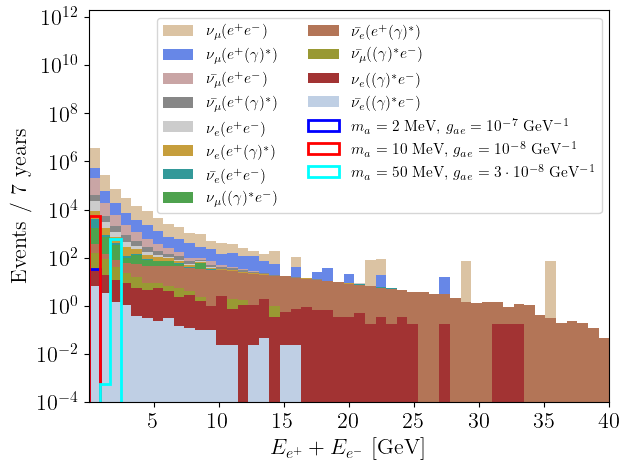

In [17]:
epem_evis_bins = np.linspace(0.03, 40.0, 50)
# Total energy

total_energies = [1e-3*(p0_epem_nuebar_1 + p0_epem_nuebar_2), 1e-3*(p0_epem_nue_1 + p0_epem_nue_2), 1e-3*(p0_epem_numubar_1 + p0_epem_numubar_2), 1e-3*(p0_epem_numu_1 + p0_epem_numu_2),
          1e-3*(p0_1g1ep_nuebar_1 + p0_1g1ep_nuebar_2), 1e-3*(p0_1g1ep_nue_1 + p0_1g1ep_nue_2), 1e-3*(p0_1g1ep_numubar_1 + p0_1g1ep_numubar_2), 1e-3*(p0_1g1ep_numu_1 + p0_1g1ep_numu_2),
          1e-3*(p0_1g1em_nuebar_1 + p0_1g1em_nuebar_2), 1e-3*(p0_1g1em_nue_1 + p0_1g1em_nue_2), 1e-3*(p0_1g1em_numubar_1 + p0_1g1em_numubar_2), 1e-3*(p0_1g1em_numu_1 + p0_1g1em_numu_2)]
sorted_epem_weights=[bkg_epem_nuebar.weights, bkg_epem_nue.weights, bkg_epem_numubar.weights, bkg_epem_numu.weights,
                  E2GAMMA_MISID*bkg_1g1ep_nuebar.weights, E2GAMMA_MISID*bkg_1g1ep_nue.weights, E2GAMMA_MISID*bkg_1g1ep_numubar.weights, E2GAMMA_MISID*bkg_1g1ep_numu.weights,
                  E2GAMMA_MISID*bkg_1g1em_nuebar.weights, E2GAMMA_MISID*bkg_1g1em_nue.weights, E2GAMMA_MISID*bkg_1g1em_numubar.weights, E2GAMMA_MISID*bkg_1g1em_numu.weights]
text_labels=[r"$\bar{\nu_e}(e^+e^-)$", r"$\nu_e(e^+e^-)$", r"$\bar{\nu_\mu}(e^+e^-)$", r"$\nu_\mu(e^+e^-)$",
            r"$\bar{\nu_e}(e^+(\gamma)^*)$", r"$\nu_e(e^+(\gamma)^*)$", r"$\bar{\nu_\mu}(e^+(\gamma)^*)$", r"$\nu_\mu(e^+(\gamma)^*)$",
            r"$\bar{\nu_e}((\gamma)^*e^-)$", r"$\nu_e((\gamma)^*e^-)$", r"$\bar{\nu_\mu}((\gamma)^*e^-)$", r"$\nu_\mu((\gamma)^*e^-)$",]

colors = [COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU, 'sienna', 'darkgoldenrod', 'dimgray', 'royalblue', 'lightsteelblue', 'darkred', 'olive', 'forestgreen']
weight_sum = [np.sum(wgts) for wgts in sorted_epem_weights]
sorted_args = np.argsort(weight_sum)
total_energies = [total_energies[i] for i in sorted_args]
sorted_epem_weights = [sorted_epem_weights[i] for i in sorted_args]
text_labels = [text_labels[i] for i in sorted_args]
sorted_colors = [colors[i] for i in sorted_args]


plt.hist(total_energies, weights=sorted_epem_weights, bins=epem_evis_bins, label=text_labels,
         stacked=True, histtype='stepfilled', color=sorted_colors, alpha=0.8)
plt.hist(1e-3*etotal_epem_2MeV, weights=wgts_epem_2MeV, bins=epem_evis_bins,
            label=param_str_2MeV_epem, color='b', histtype='step', linewidth=2.0)
plt.hist(1e-3*etotal_epem_10MeV, weights=wgts_epem_10MeV, bins=epem_evis_bins,
            label=param_str_10MeV_epem, color='r', histtype='step', linewidth=2.0)
plt.hist(1e-3*etotal_epem_50MeV, weights=wgts_epem_50MeV, bins=epem_evis_bins,
            label=param_str_50MeV_epem, color='cyan', histtype='step', linewidth=2.0)
plt.ylabel(r"Events / 7 years", fontsize=16)
plt.xlabel(r"$E_{e^+} + E_{e^-}$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=11, ncol=2)
plt.yscale('log')
plt.xlim((epem_evis_bins[0], epem_evis_bins[-1]))
plt.ylim((1e-4,2e12))
plt.tight_layout()
plt.savefig("plots/epem/energy_spectra_epem_sig-bkgs.pdf")
plt.show()
plt.close()

12


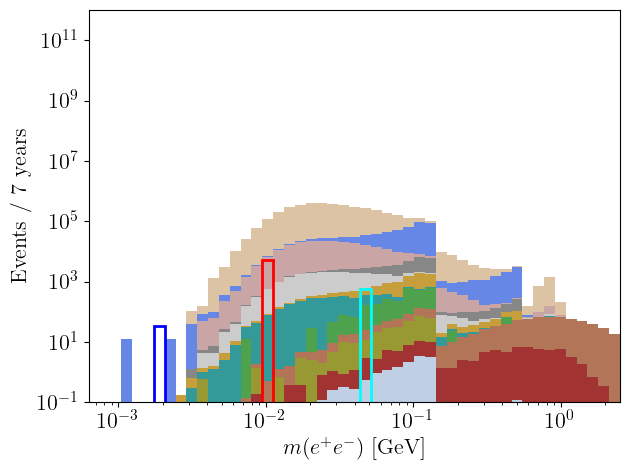

In [18]:
# mass distribution
mass_bins = np.logspace(-3.2, 0.4, 50)

masses_epem = [inv_mass_epem_nuebar*1e-3, inv_mass_epem_nue*1e-3, inv_mass_epem_numubar*1e-3, inv_mass_epem_numu*1e-3,
          inv_mass_1g1ep_nuebar*1e-3, inv_mass_1g1ep_nue*1e-3, inv_mass_1g1ep_numubar*1e-3, inv_mass_1g1ep_numu*1e-3,
          inv_mass_1g1em_nuebar*1e-3, inv_mass_1g1em_nue*1e-3, inv_mass_1g1em_numubar*1e-3, inv_mass_1g1em_numu*1e-3]
sorted_epem_weights=[bkg_epem_nuebar.weights, bkg_epem_nue.weights, bkg_epem_numubar.weights, bkg_epem_numu.weights,
                  E2GAMMA_MISID*bkg_1g1ep_nuebar.weights, E2GAMMA_MISID*bkg_1g1ep_nue.weights, E2GAMMA_MISID*bkg_1g1ep_numubar.weights, E2GAMMA_MISID*bkg_1g1ep_numu.weights,
                  E2GAMMA_MISID*bkg_1g1em_nuebar.weights, E2GAMMA_MISID*bkg_1g1em_nue.weights, E2GAMMA_MISID*bkg_1g1em_numubar.weights, E2GAMMA_MISID*bkg_1g1em_numu.weights]
text_labels=[r"$\bar{\nu_e}(e^+e^-)$", r"$\nu_e(e^+e^-)$", r"$\bar{\nu_\mu}(e^+e^-)$", r"$\nu_\mu(e^+e^-)$",
            r"$\bar{\nu_e}(e^+(\gamma)^*)$", r"$\nu_e(e^+(\gamma)^*)$", r"$\bar{\nu_\mu}(e^+(\gamma)^*)$", r"$\nu_\mu(e^+(\gamma)^*)$",
            r"$\bar{\nu_e}((\gamma)^*e^-)$", r"$\nu_e((\gamma)^*e^-)$", r"$\bar{\nu_\mu}((\gamma)^*e^-)$", r"$\nu_\mu((\gamma)^*e^-)$"]
sorted_colors = [COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU, 'sienna', 'darkgoldenrod', 'dimgray', 'royalblue', 'lightsteelblue', 'darkred', 'olive', 'forestgreen']
weight_sum = [np.sum(wgts) for wgts in sorted_epem_weights]
sorted_args = np.argsort(weight_sum)
sorted_masses_epem = [masses_epem[i] for i in sorted_args]
sorted_epem_weights = [sorted_epem_weights[i] for i in sorted_args]
text_labels = [text_labels[i] for i in sorted_args]
sorted_colors = [colors[i] for i in sorted_args]

print(len(weight_sum))

plt.hist(sorted_masses_epem, weights=sorted_epem_weights, label=text_labels,
         bins=mass_bins, stacked=True, histtype='stepfilled',
         color=sorted_colors, alpha=0.8)
plt.hist(1e-3*m2_epem_2MeV, weights=wgts_epem_2MeV, bins=mass_bins,
            label=param_str_2MeV_epem, color='b', histtype='step', linewidth=2.0)
plt.hist(1e-3*m2_epem_10MeV, weights=wgts_epem_10MeV, bins=mass_bins,
            label=param_str_10MeV_epem, color='r', histtype='step', linewidth=2.0)
plt.hist(1e-3*m2_epem_50MeV, weights=wgts_epem_50MeV, bins=mass_bins,
            label=param_str_50MeV_epem, color='cyan', histtype='step', linewidth=2.0)
plt.ylabel(r"Events / 7 years", fontsize=16)
plt.xlabel(r"$m(e^+e^-)$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=11, loc="upper right", ncol=2)
plt.yscale('log')
plt.xscale('log')
plt.xlim((mass_bins[0], mass_bins[-1]))
plt.ylim((1e-1,1e12))
plt.tight_layout()
plt.savefig("plots/epem/mass_spectra_epem_sig-bkgs.pdf")
plt.show()
plt.close()

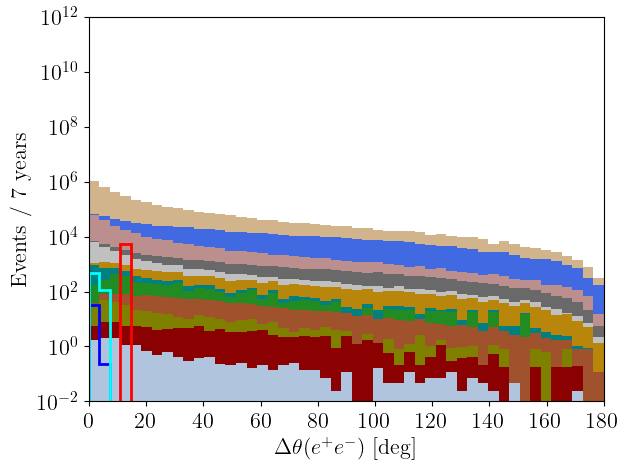

In [19]:
# ANGULAR distribution
dtheta_bins = np.linspace(0, 180.0, 50)

dthetas_epem = [bkg_epem_nuebar.dtheta_deg, bkg_epem_nue.dtheta_deg, bkg_epem_numubar.dtheta_deg, bkg_epem_numu.dtheta_deg,
                bkg_1g1ep_nuebar.dtheta_deg, bkg_1g1ep_nue.dtheta_deg, bkg_1g1ep_numubar.dtheta_deg, bkg_1g1ep_numu.dtheta_deg,
                bkg_1g1em_nuebar.dtheta_deg, bkg_1g1em_nue.dtheta_deg, bkg_1g1em_numubar.dtheta_deg, bkg_1g1em_numu.dtheta_deg]


sorted_dthetas_epem = [dthetas_epem[i] for i in sorted_args]


plt.hist(sorted_dthetas_epem, weights=sorted_epem_weights, label=text_labels,
         bins=dtheta_bins, stacked=True, histtype='stepfilled',
         color=sorted_colors, alpha=1.0)
plt.hist(dtheta_epem_2MeV*180.0/pi, weights=wgts_epem_2MeV, bins=dtheta_bins,
            label=param_str_2MeV_epem, color='b', histtype='step', linewidth=2.0)
plt.hist(dtheta_epem_10MeV*180.0/pi, weights=wgts_epem_10MeV, bins=dtheta_bins,
            label=param_str_10MeV_epem, color='r', histtype='step', linewidth=2.0)
plt.hist(dtheta_epem_500MeV*180.0/pi, weights=wgts_epem_50MeV, bins=dtheta_bins,
            label=param_str_50MeV_epem, color='cyan', histtype='step', linewidth=2.0)
plt.ylabel(r"Events / 7 years", fontsize=16)
plt.xlabel(r"$\Delta\theta(e^+e^-)$ [deg]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=11, loc="upper right", ncols=2)
plt.yscale('log')
#plt.xscale('log')
plt.xlim((dtheta_bins[0], dtheta_bins[-1]))
plt.ylim((1e-2, 1e12))
plt.tight_layout()
plt.savefig("plots/epem/dtheta_spectra_epem_sig-bkgs.pdf")
plt.show()
plt.close()

### combine all e+e- plots together

/tmp/ipykernel_12195/717854629.py:80: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0, 0.2, 1.0])


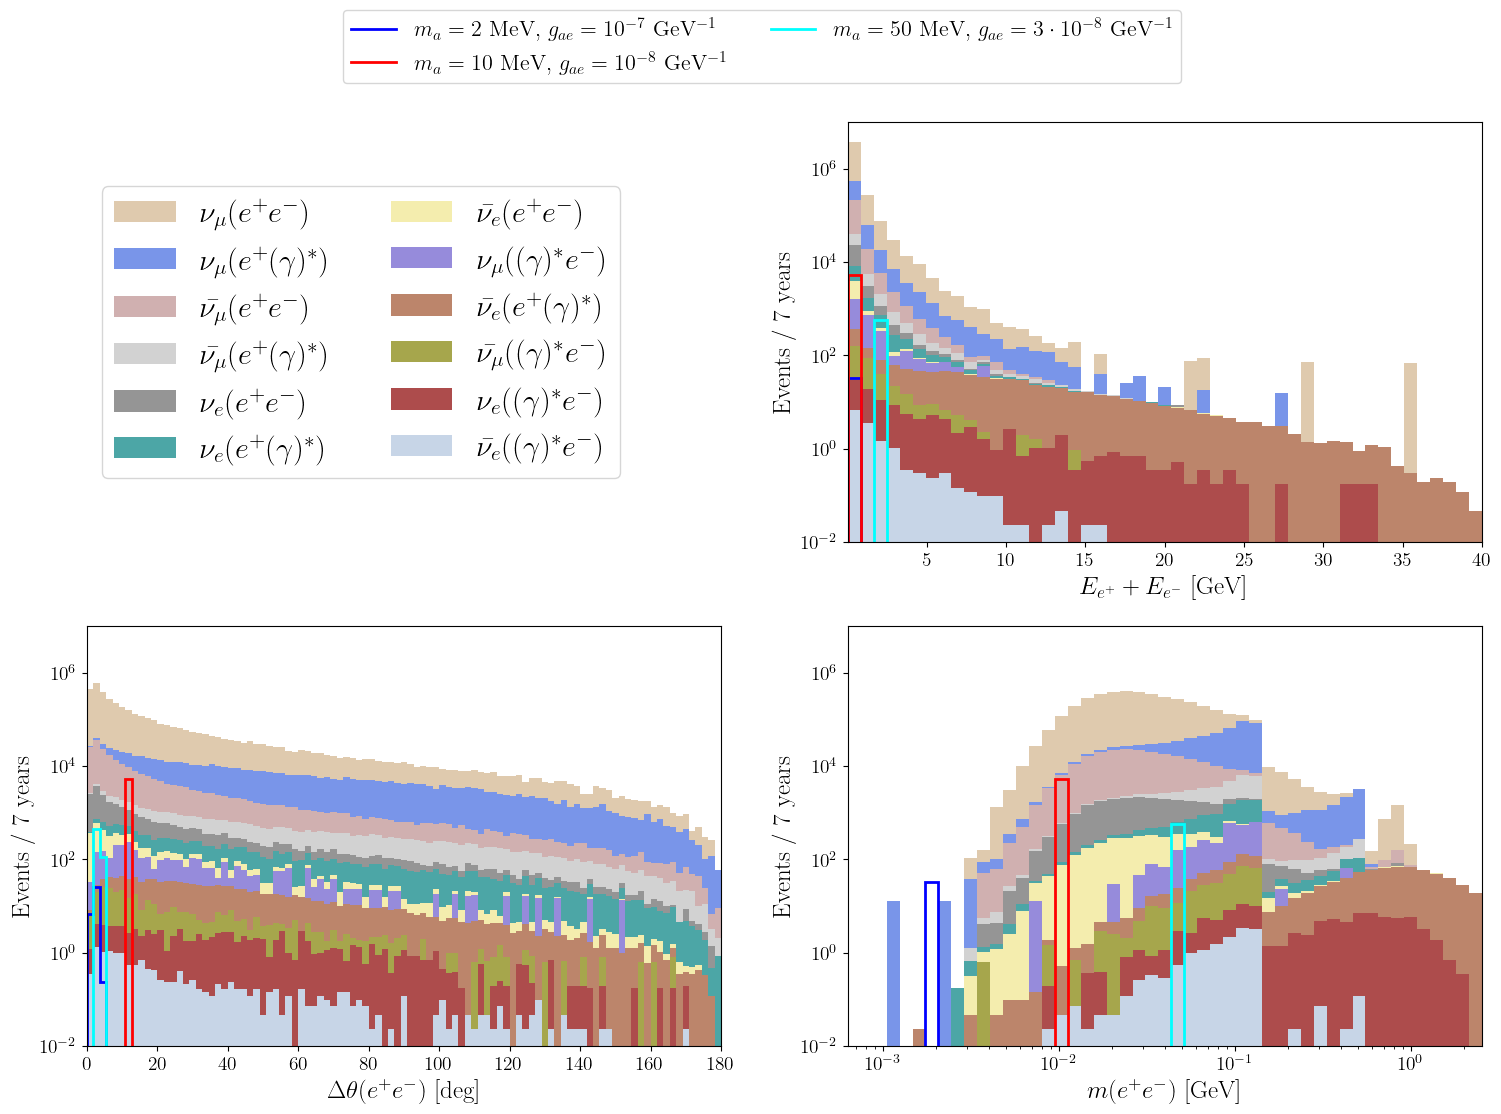

In [34]:
alp_labels = [param_str_2MeV_epem, param_str_10MeV_epem, param_str_50MeV_epem]
alp_colors = ['b', 'r', 'cyan']
alp_linestyles = ['-', '-', '-']


# Make the subplots


fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
(ax0, ax1), (ax2, ax3) = axs

ax0.axis('off')

ax1.hist(total_energies, weights=sorted_epem_weights, bins=epem_evis_bins, label=text_labels,
         stacked=True, histtype='stepfilled', color=color_array_all, alpha=0.7)
ax1.hist(1e-3*etotal_epem_2MeV, weights=wgts_epem_2MeV, bins=epem_evis_bins,
            color='b', histtype='step', linewidth=2.0)
ax1.hist(1e-3*etotal_epem_10MeV, weights=wgts_epem_10MeV, bins=epem_evis_bins,
            color='r', histtype='step', linewidth=2.0)
ax1.hist(1e-3*etotal_epem_50MeV, weights=wgts_epem_50MeV, bins=epem_evis_bins,
            color='cyan', histtype='step', linewidth=2.0)

ax1.set_xlabel(r"$E_{e^+} + E_{e^-}$ [GeV]", fontsize=18)
ax1.set_ylabel(r"Events / 7 years", fontsize=18)
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlim((20.0e-3, 40.0))
ax1.set_ylim((1e-2,1e7))


ax1.legend(fontsize=22, bbox_to_anchor=(0.0, 0.5), bbox_transform=ax0.transAxes, loc="center left", ncol=2)


dtheta_bins = np.linspace(0.0, 180.0, 100)

ax2.hist(sorted_dthetas_epem, weights=sorted_epem_weights, label=text_labels,
         bins=dtheta_bins, stacked=True, histtype='stepfilled',
         color=color_array_all, alpha=0.7)
ax2.hist(dtheta_epem_2MeV*180.0/pi, weights=wgts_epem_2MeV, bins=dtheta_bins,
            color='b', histtype='step', linewidth=2.0)
ax2.hist(dtheta_epem_10MeV*180.0/pi, weights=wgts_epem_10MeV, bins=dtheta_bins,
            color='r', histtype='step', linewidth=2.0)
ax2.hist(dtheta_epem_500MeV*180.0/pi, weights=wgts_epem_50MeV, bins=dtheta_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax2.set_xlabel(r"$\Delta\theta(e^+ e^-)$ [deg]", fontsize=18)
ax2.set_ylabel(r"Events / 7 years", fontsize=18)
ax2.set_yscale('log')
ax2.set_xlim((dtheta_bins[0], dtheta_bins[-1]))
ax2.set_ylim((1e-2, 1e7))
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

mass_bins = np.logspace(-3.2, 0.4, 50)


ax3.hist(sorted_masses_epem, weights=sorted_epem_weights, label=text_labels,
         bins=mass_bins, stacked=True, histtype='stepfilled',
         color=color_array_all, alpha=0.7)
ax3.hist(1e-3*m2_epem_2MeV, weights=wgts_epem_2MeV, bins=mass_bins,
            color='b', histtype='step', linewidth=2.0)
ax3.hist(1e-3*m2_epem_10MeV, weights=wgts_epem_10MeV, bins=mass_bins,
            color='r', histtype='step', linewidth=2.0)
ax3.hist(1e-3*m2_epem_50MeV, weights=wgts_epem_50MeV, bins=mass_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax3.set_xlabel(r"$m(e^+ e^-)$ [GeV]", fontsize=18)
ax3.set_ylabel(r"Events / 7 years", fontsize=18)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlim((mass_bins[0], mass_bins[-1]))
ax3.set_ylim((1e-2, 1e7))
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

# Create a separate legend along the top for the parametric histograms
lines = [plt.Line2D([0], [0], color=color, linestyle=ls, linewidth=2) for color, ls in zip(alp_colors, alp_linestyles)]
separate_legend = fig.legend(lines, alp_labels, loc='upper center', fontsize=16, ncol=2, borderaxespad=-0.2, bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 0.2, 1.0])
plt.savefig("plots/2g0p/energy_angle_mass_spectra_epem_sig-bkgs.pdf")
plt.show()
plt.close()



4445372.599999998


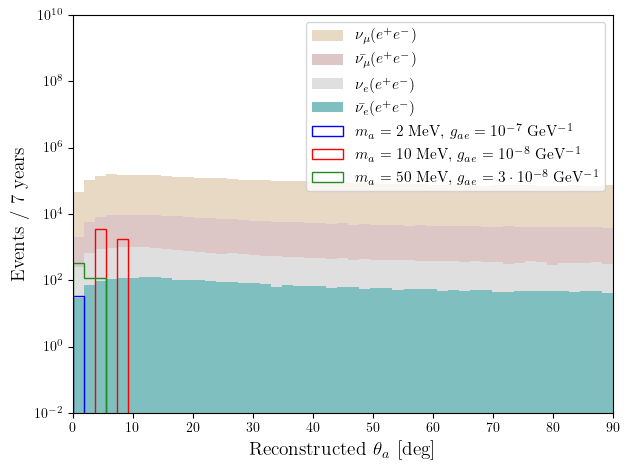

In [21]:
# ANGULAR distribution
combined_angle_epem_nue = arccos(abs(p3_epem_nue_1 + p3_epem_nue_2)/sqrt((p1_epem_nue_1 + p1_epem_nue_2)**2 + (p2_epem_nue_1 + p2_epem_nue_2)**2 + (p3_epem_nue_1 + p3_epem_nue_2)**2))
combined_angle_epem_numu = arccos(abs(p3_epem_numu_1 + p3_epem_numu_2)/sqrt((p1_epem_numu_1 + p1_epem_numu_2)**2 + (p2_epem_numu_1 + p2_epem_numu_2)**2 + (p3_epem_numu_1 + p3_epem_numu_2)**2))
combined_angle_epem_nuebar = arccos(abs(p3_epem_nuebar_1 + p3_epem_nuebar_2)/sqrt((p1_epem_nuebar_1 + p1_epem_nuebar_2)**2 + (p2_epem_nuebar_1 + p2_epem_nuebar_2)**2 + (p3_epem_nuebar_1 + p3_epem_nuebar_2)**2))
combined_angle_epem_numubar = arccos(abs(p3_epem_numubar_1 + p3_epem_numubar_2)/sqrt((p1_epem_numubar_1 + p1_epem_numubar_2)**2 + (p2_epem_numubar_1 + p2_epem_numubar_2)**2 + (p3_epem_numubar_1 + p3_epem_numubar_2)**2))

print(np.sum(weights1_numu_epem))

theta_bins = np.linspace(0.0, 90.0, 50)
plt.hist([rad_to_deg*combined_angle_epem_nuebar, rad_to_deg*combined_angle_epem_nue, rad_to_deg*combined_angle_epem_numubar, rad_to_deg*combined_angle_epem_numu],
         weights=[weights1_nuebar_epem, weights1_nue_epem, weights1_numubar_epem, weights1_numu_epem],
         label=[r"$\bar{\nu_e}(e^+e^-)$", r"$\nu_e(e^+e^-)$", r"$\bar{\nu_\mu}(e^+e^-)$", r"$\nu_\mu(e^+e^-)$"],
         bins=theta_bins, stacked=True, histtype='stepfilled', color=[COLOR_NUEBAR, COLOR_NUE, COLOR_NUMUBAR, COLOR_NUMU], alpha=0.5)
plt.hist(rad_to_deg*e1_theta_2MeV, weights=wgts_epem_2MeV, bins=theta_bins, histtype='step', label=param_str_2MeV_epem, color="b")
plt.hist(rad_to_deg*e1_theta_10MeV, weights=wgts_epem_10MeV, bins=theta_bins, histtype='step', label=param_str_10MeV_epem, color="r")
plt.hist(rad_to_deg*e1_theta_50MeV, weights=wgts_epem_50MeV, bins=theta_bins, histtype='step', label=param_str_50MeV_epem, color="forestgreen")

plt.ylabel(r"Events / 7 years", fontsize=14)
plt.xlabel(r"Reconstructed $\theta_a$ [deg]", fontsize=14)
plt.legend(fontsize=11, loc="upper right")
plt.yscale('log')
#plt.xscale('log')
plt.xlim((theta_bins[0], theta_bins[-1]))
plt.ylim((1e-2, 1e10))
plt.tight_layout()
plt.show()
plt.close()

# Plots: 1 gamma

In [22]:
bkg_1g_nue = Background1Particle(data_file_name="data/1g0p/1gamma_nue_4vectors_DUNE_bkg.txt", nu_flavor="nue")
bkg_1g_numu = Background1Particle(data_file_name="data/1g0p/1gamma_numu_4vectors_DUNE_bkg.txt", nu_flavor="numu")
bkg_1g_numubar = Background1Particle(data_file_name="data/1g0p/1gamma_numubar_4vectors_DUNE_bkg.txt", nu_flavor="numubar")
bkg_1g_nuebar = Background1Particle(data_file_name="data/1g0p/1gamma_nuebar_4vectors_DUNE_bkg.txt", nu_flavor="nuebar")

bkg_1em_nue = Background1Particle(data_file_name="data/1g0p/1em_nue_4vectors_DUNE_bkg.txt", nu_flavor="nue")
bkg_1em_numu = Background1Particle(data_file_name="data/1g0p/1em_numu_4vectors_DUNE_bkg.txt", nu_flavor="numu")
bkg_1em_numubar = Background1Particle(data_file_name="data/1g0p/1em_numubar_4vectors_DUNE_bkg.txt", nu_flavor="numubar")
bkg_1em_nuebar = Background1Particle(data_file_name="data/1g0p/1em_nuebar_4vectors_DUNE_bkg.txt", nu_flavor="nuebar")

bkg_1ep_nue = Background1Particle(data_file_name="data/1g0p/1ep_nue_4vectors_DUNE_bkg.txt", nu_flavor="nue")
bkg_1ep_numu = Background1Particle(data_file_name="data/1g0p/1ep_numu_4vectors_DUNE_bkg.txt", nu_flavor="numu")
bkg_1ep_numubar = Background1Particle(data_file_name="data/1g0p/1ep_numubar_4vectors_DUNE_bkg.txt", nu_flavor="numubar")
bkg_1ep_nuebar = Background1Particle(data_file_name="data/1g0p/1ep_nuebar_4vectors_DUNE_bkg.txt", nu_flavor="nuebar")

In [23]:
##################### BINS #####################
angle_bins = np.logspace(-5, DUNE_SOLID_ANGLE, 50)
bkg_energy_bins = np.linspace(30.0e-3, 100, 50)  # GeV
delta_angle_bins = np.linspace(0.0, 1.0, 60)
rad_to_deg = 180.0/np.pi

param_str_1MeV = r"$m_a = 1$ MeV, $g_{a\gamma} = 1.75 \cdot 10^{-5}$ GeV$^{-1}$"
param_str_10MeV = r"$m_a = 10$ MeV, $g_{a\gamma} = 1.8 \cdot 10^{-6}$ GeV$^{-1}$"
param_str_100MeV = r"$m_a = 100$ MeV, $g_{a\gamma} = 2 \cdot 10^{-7}$ GeV$^{-1}$"

# Small coupling, 2 gamma
g1e_1MeV, g2e_1MeV, g1_theta_1MeV, g2_theta_1MeV, \
    m2_1MeV, etotal_1MeV, dtheta_1MeV, wgts_1MeV = generate_alp_events_2gamma(ma=1.0, g=1.75e-8, resolved=False, n_flux_samples=200)
print("Signals: 1/6")
g1e_10MeV, g2e_10MeV, g1_theta_10MeV, g2_theta_10MeV, \
    m2_10MeV, etotal_10MeV, dtheta_10MeV, wgts_10MeV = generate_alp_events_2gamma(ma=10.0, g=1.8e-9, resolved=False, n_flux_samples=200)
print("Signals: 2/6")
g1e_100MeV, g2e_100MeV, g1_theta_100MeV, g2_theta_100MeV, \
    m2_100MeV, etotal_100MeV, dtheta_100MeV, wgts_100MeV = generate_alp_events_2gamma(ma=100.0, g=2e-10, resolved=False, n_flux_samples=200)
print("Signals: 3/6")

# Small coupling, 1 gamma

Simulating and propagating ALP flux for ma=1.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 27.41125226020813 s
Signals: 1/6
Simulating and propagating ALP flux for ma=10.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 24.57933211326599 s
Signals: 2/6
Simulating and propagating ALP flux for ma=100.0...
Running NCPU =  15
decaying 4-vectors...
    ---- Decaying took 21.079630613327026 s
Signals: 3/6


### Energy distributions

In [24]:
unique_energies = np.unique(forward_photon_flux[:,0])
print(np.log10(unique_energies)[0])
print(np.log10(unique_energies)[-1])


-0.17240793407197932
5.074056712392666


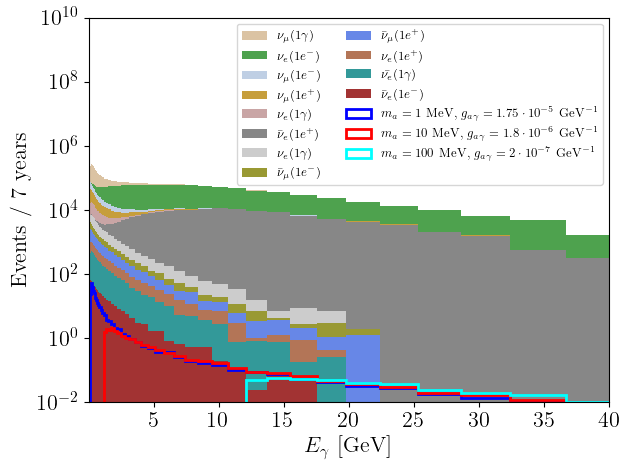

In [25]:
unique_energies = np.unique(forward_photon_flux[:,0])
#bkg_gev_bin_edges = np.linspace(0.05, 20.0, 30)
bkg_gev_bin_edges = 1e-3*np.logspace(np.log10(unique_energies[0])-0.025, np.log10(unique_energies[-1])+0.025, 100)

single_shower_energies = [1e-3*p0_ep_nue, 1e-3*p0_ep_numu, 1e-3*p0_ep_nuebar, 1e-3*p0_ep_numubar, 1e-3*p0_g_nue, 1e-3*p0_g_numu, 1e-3*p0_g_nuebar,
          1e-3*p0_g_numubar, 1e-3*p0_em_numu, 1e-3*p0_em_nuebar, 1e-3*p0_em_numubar, 1e-3*p0_em_nue]
single_shower_weights = [E2GAMMA_MISID*weights1_nue_ep, E2GAMMA_MISID*weights1_numu_ep, E2GAMMA_MISID*weights1_nuebar_ep,
                  E2GAMMA_MISID*weights1_numubar_ep, weights1_nue_g, weights1_numu_g, weights1_nuebar_g, weights1_numubar_g,
                  E2GAMMA_MISID*weights1_numu_em, E2GAMMA_MISID*weights1_nuebar_em, E2GAMMA_MISID*weights1_numubar_em,
                  E2GAMMA_MISID*weights1_nue_em]
single_shower_labels = [r"$\nu_e(1e^+)$", r"$\nu_\mu(1e^+)$", r"$\bar{\nu}_e(1e^+)$", r"$\bar{\nu}_\mu(1e^+)$", 
                r"$\nu_e(1\gamma)$", r"$\nu_\mu(1\gamma)$", r"$\bar{\nu_e}(1\gamma)$", r"$\nu_e(1\gamma)$", r"$\nu_\mu(1e^-)$", r"$\bar{\nu}_e (1e^-)$",
                r"$\bar{\nu}_\mu(1e^-)$", r"$\nu_e(1e^-)$"]
single_shower_colors=['sienna', 'darkgoldenrod', 'dimgray', 'royalblue', COLOR_NUE, COLOR_NUMU, COLOR_NUEBAR, COLOR_NUMUBAR, 'lightsteelblue', 'darkred', 'olive', 'forestgreen']

# sort
single_shower_wgt_sum = [np.sum(wgts) for wgts in single_shower_weights]
sorted_single_shower_args = np.argsort(single_shower_wgt_sum)
single_shower_energies = [single_shower_energies[i] for i in sorted_single_shower_args]
single_shower_weights = [single_shower_weights[i] for i in sorted_single_shower_args]
single_shower_labels = [single_shower_labels[i] for i in sorted_single_shower_args]
single_shower_colors = [single_shower_colors[i] for i in sorted_single_shower_args]

plt.hist(single_shower_energies, weights=single_shower_weights, label=single_shower_labels, color=single_shower_colors,
         stacked=True, bins=bkg_gev_bin_edges, histtype='stepfilled', alpha=0.8)

plt.hist(1e-3*etotal_1MeV, weights=wgts_1MeV, bins=bkg_gev_bin_edges, histtype='step', color="b", label=param_str_1MeV, linewidth=2.0)
plt.hist(1e-3*etotal_10MeV, weights=wgts_10MeV, bins=bkg_gev_bin_edges, histtype='step', color="r", label=param_str_10MeV, linewidth=2.0)
plt.hist(1e-3*etotal_100MeV, weights=wgts_100MeV, bins=bkg_gev_bin_edges, histtype='step', color="cyan", label=param_str_100MeV, linewidth=2.0)

plt.xlim((bkg_gev_bin_edges[0], 40.0))
plt.ylim((1e-2, 1e10))
plt.yscale('log')
#plt.xscale('log')
plt.ylabel("Events / 7 years", fontsize=16)
plt.xlabel(r"$E_\gamma$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2, loc="upper right", fontsize=9)
plt.tight_layout()
plt.savefig("plots/1g0p/energy_spectra_1g0p_sig-bkgs.pdf")
plt.show()

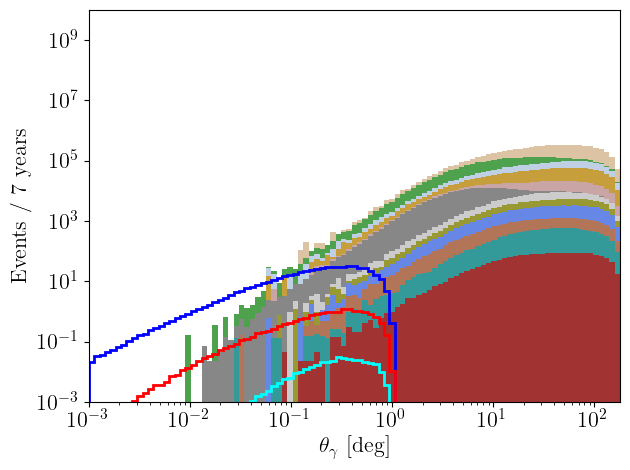

In [26]:
theta_bins = np.logspace(-3, np.log10(180.0), 100)

single_shower_thetas = [bkg_1ep_nue.theta_z_deg, bkg_1ep_numu.theta_z_deg, bkg_1ep_nuebar.theta_z_deg, bkg_1ep_numubar.theta_z_deg,
          bkg_1g_nue.theta_z_deg, bkg_1g_numu.theta_z_deg, bkg_1g_nuebar.theta_z_deg,
          bkg_1g_numubar.theta_z_deg, bkg_1em_numu.theta_z_deg, bkg_1em_nuebar.theta_z_deg, bkg_1em_numubar.theta_z_deg, bkg_1em_nue.theta_z_deg]

# sort
single_shower_thetas = [single_shower_thetas[i] for i in sorted_single_shower_args]

plt.hist(single_shower_thetas, weights=single_shower_weights, label=single_shower_labels, color=single_shower_colors,
         stacked=True, bins=theta_bins, histtype='stepfilled', alpha=0.8)

plt.hist(rad_to_deg*g1_theta_1MeV, weights=wgts_1MeV, bins=theta_bins, histtype='step', color="b", label=param_str_1MeV, linewidth=2.0)
plt.hist(rad_to_deg*g1_theta_10MeV, weights=wgts_10MeV, bins=theta_bins, histtype='step', color="r", label=param_str_10MeV, linewidth=2.0)
plt.hist(rad_to_deg*g1_theta_100MeV, weights=wgts_100MeV, bins=theta_bins, histtype='step', color="cyan", label=param_str_100MeV, linewidth=2.0)

plt.xlim((theta_bins[0], theta_bins[-1]))
plt.ylim((1e-3, 1e10))
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Events / 7 years", fontsize=16)
plt.xlabel(r"$\theta_\gamma$ [deg]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(ncol=2, loc="upper left", fontsize=9)
plt.tight_layout()
plt.savefig("plots/1g0p/theta_spectra_1g0p_sig-bkgs.pdf")
plt.show()

#### Plot 1 gamma after cuts

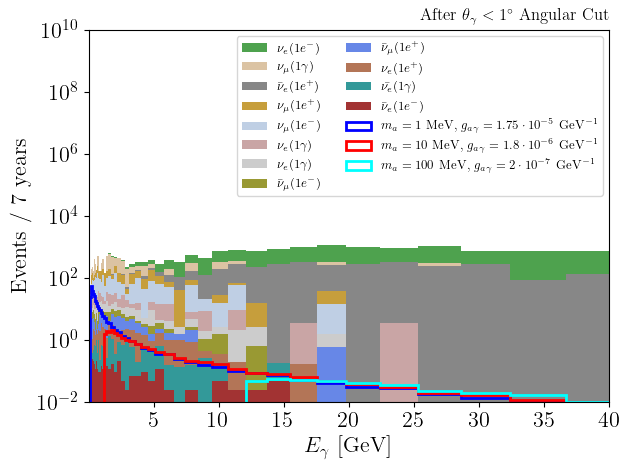

In [27]:
unique_energies = np.unique(forward_photon_flux[:,0])
bkg_gev_bin_edges = 1e-3*np.logspace(np.log10(unique_energies[0])-0.025, np.log10(unique_energies[-1])+0.025, 100)

# get backgrounds with angular cut
nue_1g_acut = bkg_1g_nue.theta_z_deg<1.0
numu_1g_acut = bkg_1g_numu.theta_z_deg<1.0
nuebar_1g_acut = bkg_1g_nuebar.theta_z_deg<1.0
numubar_1g_acut = bkg_1g_numubar.theta_z_deg<1.0
nue_1ep_acut = bkg_1ep_nue.theta_z_deg<1.0
numu_1ep_acut = bkg_1ep_numu.theta_z_deg<1.0
nuebar_1ep_acut = bkg_1ep_nuebar.theta_z_deg<1.0
numubar_1ep_acut = bkg_1ep_numubar.theta_z_deg<1.0
nue_1em_acut = bkg_1em_nue.theta_z_deg<1.0
numu_1em_acut = bkg_1em_numu.theta_z_deg<1.0
nuebar_1em_acut = bkg_1em_nuebar.theta_z_deg<1.0
numubar_1em_acut = bkg_1em_numubar.theta_z_deg<1.0

single_shower_energies = [1e-3*p0_ep_nue, 1e-3*p0_ep_numu, 1e-3*p0_ep_nuebar, 1e-3*p0_ep_numubar, 1e-3*p0_g_nue, 1e-3*p0_g_numu, 1e-3*p0_g_nuebar,
          1e-3*p0_g_numubar, 1e-3*p0_em_numu, 1e-3*p0_em_nuebar, 1e-3*p0_em_numubar, 1e-3*p0_em_nue]
single_shower_wgts_postcut = [E2GAMMA_MISID*weights1_nue_ep*nue_1ep_acut, E2GAMMA_MISID*weights1_numu_ep*numu_1ep_acut, E2GAMMA_MISID*weights1_nuebar_ep*nuebar_1ep_acut,
                  E2GAMMA_MISID*weights1_numubar_ep*numubar_1ep_acut, weights1_nue_g*nue_1g_acut, weights1_numu_g*numu_1g_acut,
                  nuebar_1g_acut*weights1_nuebar_g, weights1_numubar_g*numubar_1g_acut,
                  E2GAMMA_MISID*weights1_numu_em*numu_1em_acut, E2GAMMA_MISID*weights1_nuebar_em*nuebar_1em_acut, E2GAMMA_MISID*weights1_numubar_em*numubar_1em_acut,
                  E2GAMMA_MISID*weights1_nue_em*nue_1em_acut]
single_shower_labels = [r"$\nu_e(1e^+)$", r"$\nu_\mu(1e^+)$", r"$\bar{\nu}_e(1e^+)$", r"$\bar{\nu}_\mu(1e^+)$", 
                r"$\nu_e(1\gamma)$", r"$\nu_\mu(1\gamma)$", r"$\bar{\nu_e}(1\gamma)$", r"$\nu_e(1\gamma)$", r"$\nu_\mu(1e^-)$", r"$\bar{\nu}_e (1e^-)$",
                r"$\bar{\nu}_\mu(1e^-)$", r"$\nu_e(1e^-)$"]
single_shower_colors=['sienna', 'darkgoldenrod', 'dimgray', 'royalblue', COLOR_NUE, COLOR_NUMU, COLOR_NUEBAR, COLOR_NUMUBAR, 'lightsteelblue', 'darkred', 'olive', 'forestgreen']
single_shower_wgt_sum_postcut = [np.sum(wgts) for wgts in single_shower_wgts_postcut]
sorted_single_shower_args_postcut = np.argsort(single_shower_wgt_sum_postcut)
single_shower_energies = [single_shower_energies[i] for i in sorted_single_shower_args_postcut]
single_shower_wgts_postcut = [single_shower_wgts_postcut[i] for i in sorted_single_shower_args_postcut]
single_shower_labels = [single_shower_labels[i] for i in sorted_single_shower_args_postcut]
single_shower_colors = [single_shower_colors[i] for i in sorted_single_shower_args_postcut]

plt.hist(single_shower_energies, weights=single_shower_wgts_postcut, label=single_shower_labels, color=single_shower_colors,
         stacked=True, bins=bkg_gev_bin_edges, histtype='stepfilled', alpha=0.8)

plt.hist(1e-3*etotal_1MeV, weights=wgts_1MeV, bins=bkg_gev_bin_edges, histtype='step', color="b", label=param_str_1MeV, linewidth=2.0)
plt.hist(1e-3*etotal_10MeV, weights=wgts_10MeV, bins=bkg_gev_bin_edges, histtype='step', color="r", label=param_str_10MeV, linewidth=2.0)
plt.hist(1e-3*etotal_100MeV, weights=wgts_100MeV, bins=bkg_gev_bin_edges, histtype='step', color="cyan", label=param_str_100MeV, linewidth=2.0)

plt.xlim((bkg_gev_bin_edges[0], 40.0))
plt.ylim((1e-2, 1e10))
plt.yscale('log')
#plt.xscale('log')
plt.ylabel("Events / 7 years", fontsize=16)
plt.xlabel(r"$E_\gamma$ [GeV]", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2, loc="upper right", fontsize=9)
plt.title(r"After $\theta_\gamma < 1^\circ$ Angular Cut", loc="right")
plt.tight_layout()
plt.savefig("plots/1g0p/energy_spectra_1g0p_sig-bkgs_postcut.pdf")
plt.show()

# 1em 1gamma

### Generate signal

In [62]:
alp_masses = [0.1, 0.5, 0.9]

def get_compton_spectra(ma, gae):
    flux_gen = ElectronALPFromBeam4Vectors(axion_mass=ma, axion_coupling=gae, target=Material("C"), n_samples=400000)
    flux_gen.simulate()
    flux_gen.propagate(is_isotropic=False, new_coupling=gae)


    alp_flux_energies = np.array(flux_gen.axion_energy)
    alp_flux_angles = np.array(flux_gen.axion_angle)
    alp_flux_wgt = flux_gen.scatter_axion_weight

    flux_array = np.array([alp_flux_energies, alp_flux_angles, alp_flux_wgt]).transpose()
    em_energy, gamma_energy, em_theta_z, gamma_theta_z, \
        total_energy, sep_angles, event_weights = \
            compton_scatter_events(input_flux=flux_array, ALP_MASS=ma, resolved=True)

    alp_x = gamma_energy / em_energy

    return em_energy, gamma_energy, total_energy, alp_x, sep_angles, np.power(gae, 2) * event_weights


em_e_1, gamma_e_1, total_e_1, egamma_x_1, dtheta_egamma_1, egamma_wgt_1 = get_compton_spectra(alp_masses[0], 1e-4)
em_e_2, gamma_e_2, total_e_2, egamma_x_2, dtheta_egamma_2, egamma_wgt_2 = get_compton_spectra(alp_masses[1], 1e-4)
em_e_3, gamma_e_3, total_e_3, egamma_x_3, dtheta_egamma_3, egamma_wgt_3 = get_compton_spectra(alp_masses[2], 1e-4)

### Total energy (e- gamma)

### opening angle (e- gamma)

### energy fraction (e- gamma)

### Combined plots

/tmp/ipykernel_12195/4102142526.py:115: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0, 0.2, 1.0])


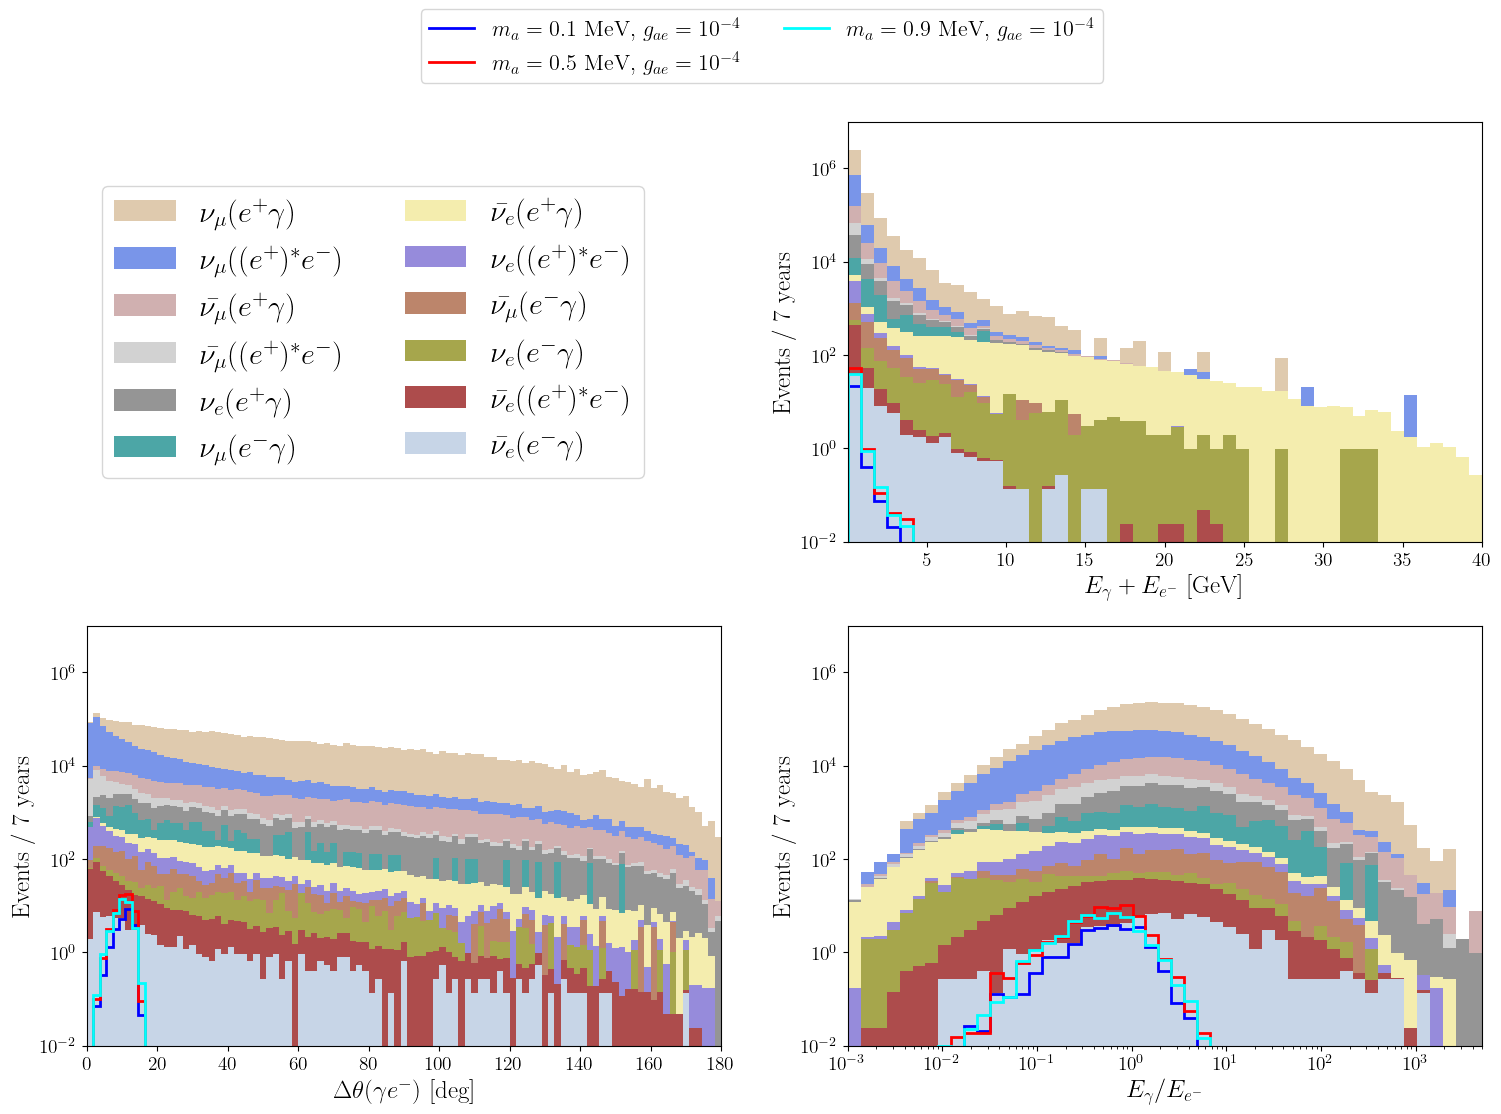

In [64]:
epem_evis_bins = np.linspace(0.03, 40.0, 50)
# Total energy

total_energies_emgamma = [1e-3*(p0_1g1ep_nuebar_1 + p0_1g1ep_nuebar_2), 1e-3*(p0_1g1ep_nue_1 + p0_1g1ep_nue_2),
                          1e-3*(p0_1g1ep_numubar_1 + p0_1g1ep_numubar_2), 1e-3*(p0_1g1ep_numu_1 + p0_1g1ep_numu_2),
                          1e-3*(p0_1g1em_nuebar_1 + p0_1g1em_nuebar_2), 1e-3*(p0_1g1em_nue_1 + p0_1g1em_nue_2),
                          1e-3*(p0_1g1em_numubar_1 + p0_1g1em_numubar_2), 1e-3*(p0_1g1em_numu_1 + p0_1g1em_numu_2),
                          1e-3*(p0_epem_nuebar_1 + p0_epem_nuebar_2), 1e-3*(p0_epem_nue_1 + p0_epem_nue_2),
                          1e-3*(p0_epem_numubar_1 + p0_epem_numubar_2), 1e-3*(p0_epem_numu_1 + p0_epem_numu_2)]

dthetas_emgamma = [bkg_1g1ep_nuebar.dtheta_deg, bkg_1g1ep_nue.dtheta_deg, bkg_1g1ep_numubar.dtheta_deg, bkg_1g1ep_numu.dtheta_deg,
                   bkg_1g1em_nuebar.dtheta_deg, bkg_1g1em_nue.dtheta_deg, bkg_1g1em_numubar.dtheta_deg, bkg_1g1em_numu.dtheta_deg,
                   bkg_epem_nuebar.dtheta_deg, bkg_epem_nue.dtheta_deg, bkg_epem_numubar.dtheta_deg, bkg_epem_numu.dtheta_deg]

x_list_emgamma = [(p0_1g1ep_nuebar_1/p0_1g1ep_nuebar_2), (p0_1g1ep_nue_1/p0_1g1ep_nue_2),
                  (p0_1g1ep_numubar_1/p0_1g1ep_numubar_2), (p0_1g1ep_numu_1/p0_1g1ep_numu_2),
                  (p0_1g1em_nuebar_1/p0_1g1em_nuebar_2), (p0_1g1em_nue_1/p0_1g1em_nue_2),
                  (p0_1g1em_numubar_1/p0_1g1em_numubar_2), (p0_1g1em_numu_1/p0_1g1em_numu_2),
                  (p0_epem_nuebar_1/p0_epem_nuebar_2), (p0_epem_nue_1/p0_epem_nue_2),
                  (p0_epem_numubar_1/p0_epem_numubar_2), (p0_epem_numu_1/p0_epem_numu_2)]

emgamma_weights=[bkg_1g1ep_nuebar.weights, bkg_1g1ep_nue.weights, bkg_1g1ep_numubar.weights, bkg_1g1ep_numu.weights,
                  bkg_1g1em_nuebar.weights, bkg_1g1em_nue.weights, bkg_1g1em_numubar.weights, bkg_1g1em_numu.weights,
                  E2GAMMA_MISID*bkg_epem_nuebar.weights, E2GAMMA_MISID*bkg_epem_nue.weights, E2GAMMA_MISID*bkg_epem_numubar.weights, E2GAMMA_MISID*bkg_epem_numu.weights]

text_labels_emgamma=[r"$\bar{\nu_e}(e^+ \gamma)$", r"$\nu_e(e^+ \gamma)$", r"$\bar{\nu_\mu}(e^+ \gamma)$", r"$\nu_\mu(e^+ \gamma)$",
                     r"$\bar{\nu_e}(e^- \gamma)$", r"$\nu_e(e^- \gamma)$", r"$\bar{\nu_\mu}(e^- \gamma)$", r"$\nu_\mu(e^- \gamma)$",
                     r"$\bar{\nu_e}((e^+)^*e^-)$", r"$\nu_e((e^+)^*e^-)$", r"$\bar{\nu_\mu}((e^+)^*e^-)$", r"$\nu_\mu((e^+)^*e^-)$"]
weight_sum = [np.sum(wgts) for wgts in emgamma_weights]
sorted_args = np.argsort(weight_sum)
total_energies_emgamma = [total_energies_emgamma[i] for i in sorted_args]
sorted_dthetas_emgamma = [dthetas_emgamma[i] for i in sorted_args]
sorted_x_emgamma = [x_list_emgamma[i] for i in sorted_args]
sorted_emgamma_weights = [emgamma_weights[i] for i in sorted_args]
text_labels_emgamma = [text_labels_emgamma[i] for i in sorted_args]


alp_labels = [r"$m_a = 0.1$ MeV, $g_{ae} = 10^{-4}$", r"$m_a = 0.5$ MeV, $g_{ae} = 10^{-4}$", r"$m_a = 0.9$ MeV, $g_{ae} = 10^{-4}$"]
alp_colors = ['b', 'r', 'cyan']
alp_linestyles = ['-', '-', '-']


# Make the subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharey=False)
(ax0, ax1), (ax2, ax3) = axs

ax0.axis('off')

ax1.hist(total_energies_emgamma, weights=sorted_emgamma_weights, bins=epem_evis_bins, label=text_labels_emgamma,
         stacked=True, histtype='stepfilled', color=color_array_all, alpha=0.7)
ax1.hist(1e-3*total_e_1, weights=egamma_wgt_1, bins=epem_evis_bins,
            color='b', histtype='step', linewidth=2.0)
ax1.hist(1e-3*total_e_2, weights=egamma_wgt_2, bins=epem_evis_bins,
            color='r', histtype='step', linewidth=2.0)
ax1.hist(1e-3*total_e_3, weights=egamma_wgt_3, bins=epem_evis_bins,
            color='cyan', histtype='step', linewidth=2.0)

ax1.set_xlabel(r"$E_{\gamma} + E_{e^-}$ [GeV]", fontsize=18)
ax1.set_ylabel(r"Events / 7 years", fontsize=18)
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlim((20.0e-3, 40.0))
ax1.set_ylim((1e-2,1e7))


ax1.legend(fontsize=22, bbox_to_anchor=(0.0, 0.5), bbox_transform=ax0.transAxes, loc="center left", ncol=2)


dtheta_bins = np.linspace(0.0, 180.0, 100)

ax2.hist(sorted_dthetas_emgamma, weights=sorted_emgamma_weights, label=text_labels_emgamma,
         bins=dtheta_bins, stacked=True, histtype='stepfilled',
         color=color_array_all, alpha=0.7)
ax2.hist(dtheta_egamma_1*180.0/pi, weights=egamma_wgt_1, bins=dtheta_bins,
            color='b', histtype='step', linewidth=2.0)
ax2.hist(dtheta_egamma_2*180.0/pi, weights=egamma_wgt_2, bins=dtheta_bins,
            color='r', histtype='step', linewidth=2.0)
ax2.hist(dtheta_egamma_3*180.0/pi, weights=egamma_wgt_3, bins=dtheta_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax2.set_xlabel(r"$\Delta\theta(\gamma e^-)$ [deg]", fontsize=18)
ax2.set_ylabel(r"Events / 7 years", fontsize=18)
ax2.set_yscale('log')
ax2.set_xlim((dtheta_bins[0], dtheta_bins[-1]))
ax2.set_ylim((1e-2, 1e7))
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

x_bins = np.logspace(-3, np.log10(5e3), 50)


ax3.hist(sorted_x_emgamma, weights=sorted_emgamma_weights, label=text_labels_emgamma,
         bins=x_bins, stacked=True, histtype='stepfilled',
         color=color_array_all, alpha=0.7)
ax3.hist(egamma_x_1, weights=egamma_wgt_1, bins=x_bins,
            color='b', histtype='step', linewidth=2.0)
ax3.hist(egamma_x_2, weights=egamma_wgt_2, bins=x_bins,
            color='r', histtype='step', linewidth=2.0)
ax3.hist(egamma_x_3, weights=egamma_wgt_3, bins=x_bins,
            color='cyan', histtype='step', linewidth=2.0)
ax3.set_xlabel(r"$E_\gamma / E_{e^-}$", fontsize=18)
ax3.set_ylabel(r"Events / 7 years", fontsize=18)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_xlim((x_bins[0], x_bins[-1]))
ax3.set_ylim((1e-2, 1e7))
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)

# Create a separate legend along the top for the parametric histograms
lines = [plt.Line2D([0], [0], color=color, linestyle=ls, linewidth=2) for color, ls in zip(alp_colors, alp_linestyles)]
separate_legend = fig.legend(lines, alp_labels, loc='upper center', fontsize=16, ncol=2, borderaxespad=-0.2, bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 0.2, 1.0])
plt.savefig("plots/1em1gamma/energy_angle_mass_spectra_emgamma_sig-bkgs.pdf")
plt.show()
plt.close()

